In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
dir_fig = 'fragile_x_all/'

In [3]:
file_in = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/FMR1_ALL/methyl_data.tsv'
df = pd.read_table(file_in, sep='\t', header=0, keep_default_na=False)
df = df.loc[df.region_id.str.contains('_5UTR')].copy()
#df = df.reindex(index=[i for i in range(df.shape[0])])
#.reindex(labels=[])
print('df:')
display(df)

file_sam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/snoopsv_methyl/FMR1_ALL/methyl_data_sample_order.txt'
with open(file_sam, 'r') as fh:
    sample_order = fh.readline().split(',')[:-1] # last one is an empty string
print(f'number of samples: {len(sample_order)}')
#print(f'sample order: {sample_order}')

df:


,chrom,pos,end,region_id,methyl_h1,methyl_h2,methyl_h0,bp_dev_h1,bp_dev_h2,bp_dev_h0,rn_h1,rn_h2,rn_h0
1,chrX,147911920,147912179,FMR1_5UTR,.;.;.;91|95|100|99|96|100|99|98|98|96|96|97|94...,.;.;.;64|20|7|2|0|0|0|0|0|0|2|0|1|0|0|0|0|0|3|...,.;0|0|0|0|0|0|0|1|2|32|27|13|7|5|46|27|29|15|3...,".;.;.;32;.;.;30;.;31,30;34;27,27,27,29;.;.;.;3...",".;.;.;31,43,30;.;.;30,28,28,31;.;30,30,32;34,2...",".;51,51,51,57,51,51,52;30;.;.;30;.;34,31;.;.;....",.;.;.;m54340U_200716_153006/27724288/ccs;.;.;m...,".;.;.;m54340U_200716_153006/75497573/ccs,m5434...",".;m54340U_210523_044800/52758275/ccs,m54340U_2..."
7,chrX,149505139,149505306,IDS_5UTR,.;.;.;8|2|2|1|0|0|0|0|0|1|0|7|1|0|3|2|1|4|0|0|...,.;.;.;62|51|80|91|75|95|89|98|99|98|97|99|99|9...,.;0|2|0|1|0|1|6|2|1|8|9|13|6|3|4|8|5|0|1|0|0|0...,".;.;.;1;.;.;.;.;.;2;.;.;.;.;0,0,2;.;.;-1,1,0;....",".;.;.;0;.;.;.;.;.;.;.;.;.;.;.;.;.;1,0,1;.;.;.;...",".;0,2;3;.;0,0;0;-1,1,0,1;0,-2,0;0,0,-1,0;0,0,1...",.;.;.;m54340U_200716_153006/128059025/ccs;.;.;...,.;.;.;m54340U_200716_153006/133105829/ccs;.;.;...,".;m54340U_200806_070905/88277013/ccs,m54340U_2..."
8,chrX,149631582,149631792,TMEM185A_5UTR,.;.;.;.;.;.;95|91|35|70|18|12|12|62|41|61|26|6...,.;.;.;.;73|60|29|4|2|7|3|1|1|1|1|0|0|0|8|17|11...,5|0|0|0|0|13|5|7|20|56|43|61|72|96|91|64|21|11...,".;.;.;.;.;.;-21,-21,-21;.;-21,-15;.;15,9;.;0;....",".;.;.;.;-21;.;.,9,0;.;-21,-21;.;-21;.;-11;.;.;...","-21,-19;-21,-21,-21,-21,-18,-21,-21,-25;.;-19;...",.;.;.;.;.;.;m54340U_210703_193517/110166254/cc...,.;.;.;.;m54340U_200716_153006/94110941/ccs;.;m...,"m54340U_200716_001732/174262380/ccs,m54340U_20..."
9,chrX,150363318,150363530,MAMLD1_5UTR,.;.;.;3|2|5|5|4|1|3|3|1|0|0|0|0|0|0|0|0|0|0|4|...,.;.;.;.;.;.;71|65|46|44|7|4|0|0|0|0|0|2|64|66|...,0|2|2|2|0|0|1|6|1|3|2|49|71|55|13|6|11|26|7|5|...,".;.;.;0;.;.;-1;.;0,0;32,33,35,29,29,34,34;1,-1...",".;.;.;.;.;.;1,3;.;.;1,2,2;0,1,3;.;1,1;.;1,0;.;...","-1;0,0,0;.;.;0,3;4,1;1,0,1,1;0,1,0,0;.;.;.;37,...",.;.;.;m54340U_200716_153006/71501671/ccs;.;.;m...,.;.;.;.;.;.;m54340U_200806_223416/98175724/ccs...,m54340U_200716_001732/24969595/ccs;m54340U_210...
10,chrX,150568622,150568662,MTM1_5UTR,".;.;.;.;.;.;.;.;.;3|13|4|2|0|0,98|99|98|95|97|...",".;.;.;.;.;.;.;.;.;100|100|100|100|100|100,45|5...","1|0|0|0|0|0,2|4|2|0|0|6,7|14|13|9|1|0,2|13|6|0...",".;.;.;.;.;.;.;.;.;0,0;0,0;.;0,0,0;.;.;.;.;0,0;...",".;.;.;.;.;.;.;.;.;0,2;0;.;0,-1;.;.;.;.;1;.;.;....","0,0,0,0,0;0,0,0;0;.;0,0;.;2,0,0,0;.;.,0,0,1,0,...",.;.;.;.;.;.;.;.;.;m54340U_200611_224317/158271...,.;.;.;.;.;.;.;.;.;m54340U_200611_224317/107350...,"m54340U_200716_001732/162859070/ccs,m54340U_20..."
11,chrX,150693397,150693530,MTMR1_5UTR,.;.;.;.;.;.;.;.;.;2|1|2|10|11|5|3|2|3|1|1|5|18...,.;.;.;.;.;.;.;.;.;.;.;.;2|0|0|5|2|5|12|23|34|4...,6|4|6|5|10|63|82|90|76|34|11|6|1|2|2|1|1|3|2|4...,".;.;.;.;.;.;.;.;.;1,0,1,0,2,0;1,2,2,1,1;.;.;.;...",".;.;.;.;.;.;.;.;.;.;.;.;-1,1,-1;.;0,2,3;.;.;0,...","1,0,0;0,0,0,0,2,0,1;.;0;0,0;0;0,0,0,1,1;0,-1,0...",.;.;.;.;.;.;.;.;.;m54340U_200611_224317/609751...,.;.;.;.;.;.;.;.;.;.;.;.;m54340U_200611_224317/...,"m54340U_200716_001732/53740679/ccs,m54340U_200..."
12,chrX,150898590,150898668,CD99L2_5UTR,.;.;.;8|7|9|52|43|81|48|25;.;.;88|47|83|82|98|...,".;.;.;2|0|0|1|0|0|0|0;.;.;0|0|0|0|0|0|0|13,62|...","0|0|1|0|1|1|6|4,1|1|1|4|3|16|46|69;0|0|0|0|1|1...",".;.;.;1;.;.;0,1;.;0;0,0,-1;0,0;.;0,0,1;.;.;.;....",".;.;.;1;.;.;0,0,0;.;.;0,0,1;2,1;.;1,0;.;.;.;.;...","0,0;0,0;.;1,3;2,0,1;.;.;-2,2,0;.;.;.;1,0;.;0;0...",.;.;.;m54340U_200716_153006/24904108/ccs;.;.;m...,.;.;.;m54340U_200716_153006/134351559/ccs;.;.;...,"m54340U_200716_001732/156107929/ccs,m54340U_20..."
13,chrX,150983336,150983376,HMGB3_5UTR,".;.;.;.;.;.;100|100|100|100|100,11|61|12|40|64...",.;.;.;.;.;.;29|50|50|41;.;93|98|98|85|95;70|67...,".;2|11|5|2|6,2|1|15|3|11,5|9|6|2|0;.;.;80|76|5...",".;.;.;.;.;.;0,1,0;.;.;0,0,0;0,0,0;.;0,0;.;.;.;...",".;.;.;.;.;.;.;.;0;0;0,0,0;.;2,0,0,0;.;0;0;.;-1...",".;0,0,0;.;.;0;0,0,0;.;0,0,0;0;0,0;.;0,0,0;.;0,...",.;.;.;.;.;.;m54340U_210703_193517/127796270/cc...,.;.;.;.;.;.;

number of samples: 270


In [4]:
df_exnd = df[['chrom' ,'pos', 'end', 'region_id']].copy()
cols = df.columns.tolist()[4:]
#print(cols)

for idx, sample in enumerate(sample_order):
    #if sample == 'REACH000450' or sample == 'REACH000452':
    #    continue
    for col in cols:
        df_exnd[f'{sample}_{col}'] = df[col].str.split(';').apply(lambda row: row[idx])
display(df_exnd)

,chrom,pos,end,region_id,REACH000026_methyl_h1,REACH000026_methyl_h2,REACH000026_methyl_h0,REACH000026_bp_dev_h1,REACH000026_bp_dev_h2,REACH000026_bp_dev_h0,...,REACH000684_rn_h0,REACH000685_methyl_h1,REACH000685_methyl_h2,REACH000685_methyl_h0,REACH000685_bp_dev_h1,REACH000685_bp_dev_h2,REACH000685_bp_dev_h0,REACH000685_rn_h1,REACH000685_rn_h2,REACH000685_rn_h0
1,chrX,147911920,147912179,FMR1_5UTR,.,.,.,.,.,.,...,.,.,.,2|0|15|0|2|4|35|71|4|0|1|7|0|10|0|2|0|0|0|0|58...,.,.,"13,17,33,29,16",.,.,"658567b8-0bb0-48a8-a85d-619f26f01f60,ec6386b7-..."
7,chrX,149505139,149505306,IDS_5UTR,.,.,.,.,.,.,...,"f73f95fe-76d3-41e0-8469-c8456874f172,6e115d22-...",.,.,11|0|0|0|0|15|0|0|0|4|89|91|2|0|0|0|1|9|93|89|...,.,.,"6,-14,-3,-4,-29,-24,-17,-8,-69",.,.,"dbdc51c7-868d-4c1e-aef8-54b4be7616b1,ee73bd80-..."
8,chrX,149631582,149631792,TMEM185A_5UTR,.,.,5|0|0|0|0|13|5|7|20|56|43|61|72|96|91|64|21|11...,.,.,"-21,-19",...,"3a23193f-a7dc-4723-82a1-80cdcf61dd63,87c620df-...",.,.,"100|4|30|7|40|97|0,0|0|0|0|2|0|0|1|0|0|0|0|2|2...",.,.,"-23,-13,-2,-8,-21,.",.,.,"0bdcf4ce-425a-4468-9796-785e0a2817f8,8d6dac54-..."
9,chrX,150363318,150363530,MAMLD1_5UTR,.,.,0|2|2|2|0|0|1|6|1|3|2|49|71|55|13|6|11|26|7|5|...,.,.,-1,...,"1fd78472-ace3-40c8-ac5e-a8177b6a7284,0a85a084-...",.,.,1|0|1|0|0|0|4|0|3|61|9|12|46|79|84|75|0|1|0|0|...,.,.,"-8,-3,-11,-2,-17,8,-5,-2",.,.,"b0ddb187-c71b-4f31-8e70-da57f39b8cff,9b1c13e4-..."
10,chrX,150568622,150568662,MTM1_5UTR,.,.,"1|0|0|0|0|0,2|4|2|0|0|6,7|14|13|9|1|0,2|13|6|0...",.,.,"0,0,0,0,0",...,"76f39933-8fcc-46eb-a59a-6a6cd09427dc,a36f05c0-...",.,.,"40|36|9|41|79|30|22|2|45,4|2|0|0|0|0|5,0|4|0|1...",.,.,"9,-1,-2,2,6",.,.,"7178be63-b143-43d2-b646-7f250eee984a,3152af87-..."
11,chrX,150693397,150693530,MTMR1_5UTR,.,.,6|4|6|5|10|63|82|90|76|34|11|6|1|2|2|1|1|3|2|4...,.,.,"1,0,0",...,"676248ca-67b4-40c0-9fc5-32e5b3373c0b,f81f4122-...",.,.,"0|9|0|1|0|0|0|1|13|0|16|0|0|2|0|5,55|70|9|2|1|...",.,.,"-10,-2,5,0,-3,3,5,-5,-16,-4",.,.,"33acaac3-8252-404b-b9e8-e6c5fde090e9,21350c97-..."
12,chrX,150898590,150898668,CD99L2_5UTR,.,.,"0|0|1|0|1|1|6|4,1|1|1|4|3|16|46|69",.,.,"0,0",...,"ca01fc96-4616-4d64-9ad7-2f89ec68a1e5,3484b9c0-...",33|9|91|41|0|2|1|6,"1|0|0|7|7|0|0|0|2,45|0|21|0|0|2|0|2","46|85,0|49|2|0|0|4|0|0,0|80|0|2|0|3|0|36,10|0",-3,"4,0","-6,-6,-5,.",5af74e3f-fde8-469d-9c44-8ca2cce771d2,"34a1e889-e5f6-4400-8f70-0d32c5afd4d6,7d1b38e0-...","1ae72adc-1d37-4141-bfa6-590e0ec211d1,46f0b406-..."
13,chrX,150983336,150983376,HMGB3_5UTR,.,.,.,.,.,.,...,"58341e7d-ff66-4acc-8aaa-0dbc00054c82,b0d7c6e3-...",.,.,"0|0|12|0,0|0|0|0|2",.,.,"-1,-6",.,.,"519f9439-750b-421f-9828-4705fb07f845,94933348-..."


In [5]:
file_cov = '/expanse/projects/sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
#file_cov = '/tscc/projects/ps-sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
df_cov_high = df_cov.loc[df_cov.SAMPLE.str.startswith('REACH000') & (df_cov.MEAN_COVERAGE > 9)]
display(df_cov)
high_cov_samples = df_cov_high.SAMPLE.tolist()
#print(high_cov_samples)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

def get_cov(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['MEAN_COVERAGE'].values[0]
    except:
        print(f'problem with samples: {sample} in get_cov')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}
plat_dict['REACH000226_blood'] = plat_dict['REACH000226']
plat_dict['REACH000226_sperm'] = plat_dict['REACH000226']
#print('plat_dict:')
#print(plat_dict)

cov_dict = {sample: get_cov(sample) for sample in df_cov.SAMPLE.tolist()}
#print('cov_dict:')
#print(cov_dict)

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [6]:
file_psam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/process_IL_LR/HWE/REACH_LR_platform.psam'
df_p = pd.read_table(file_psam, sep='\t', header=None, names = ['famid', 'sample_id', 'dad', 'mom', 'sex', 'phen'])
#print('df_p:')
#display(df_p)
ds_sex = df_p.set_index('sample_id').sex
#display(ds_sex)

#print('complete trios:')
df_trios = df_p.loc[df_p.dad.isin(df_p.sample_id) & df_p.mom.isin(df_p.sample_id)]
print('df_trios:')
display(df_trios.shape)

### make a samples dataframe containing all samples in complete trios
df_samples = pd.DataFrame()
df_samples['sample_id'] = df_trios['sample_id']
df_samples['rel'] = 'C'

df_dads = pd.DataFrame()
df_dads['sample_id'] =  list(set(df_trios['dad'].tolist()))
df_dads['rel'] = 'D'
df_samples = pd.concat([df_samples, df_dads])

df_moms = pd.DataFrame()
df_moms['sample_id'] =  list(set(df_trios['mom'].tolist()))
df_moms['rel'] = 'M'
df_samples = pd.concat([df_samples, df_moms])

df_samples['sex'] = df_samples.sample_id.map(ds_sex)
df_samples['plat'] = df_samples.sample_id.map(plat_dict)
df_samples['coverage'] = df_samples.sample_id.map(cov_dict)
### add blood/sperm sections for REACH000226
row_add = pd.DataFrame({'sample_id':['REACH000226_blood', 'REACH000226_sperm'] ,'rel':['D', 'D'] ,'sex':[1, 1] ,'plat':['ONT', 'ONT'] ,'coverage':[1.92, 27.87]})
df_samples = pd.concat([df_samples, row_add])
pd.set_option('display.max_rows', 10)
print('df_samples:')
display(df_samples)

print(df_samples.sex.value_counts())
print(df_samples.plat.value_counts())
print(df_samples.rel.value_counts())

print('===============================')
df_samples_flt = df_samples.loc[(df_samples.coverage>=2)]
print('df_samples_flt:')
display(df_samples_flt.shape)

print('===============================')
df_samples_flt_female_kids = df_samples_flt.loc[(df_samples_flt.sex==2)&(df_samples_flt.rel=='C')]
print('df_samples_flt_female_kids:')
display(df_samples_flt_female_kids.shape)
print(df_samples_flt_female_kids.plat.value_counts())

print('===============================')
df_samples_flt_females = df_samples_flt.loc[(df_samples_flt.sex==2)]
print('df_samples_flt_females:')
display(df_samples_flt_females.shape)
print(df_samples_flt_females.plat.value_counts())
print(df_samples_flt_females.rel.value_counts())

print('===============================')
df_samples_flt_males = df_samples_flt.loc[(df_samples_flt.sex==1)]
print('df_samples_flt_males:')
display(df_samples_flt_males.shape)
print(df_samples_flt_males.plat.value_counts())
print(df_samples_flt_males.rel.value_counts())
print(df_samples_flt_males.sample_id.tolist())

df_trios:


(117, 6)

df_samples:


,sample_id,rel,sex,plat,coverage
10,REACH000026,C,1,PB,3.22
11,REACH000058,C,1,PB,6.19
12,REACH000065,C,1,PB,1.22
15,REACH000086,C,1,PB,2.70
18,REACH000089,C,2,PB,3.27
...,...,...,...,...,...
60,REACH000420,M,2,ONT,9.35
61,REACH000511,M,2,ONT,8.19
62,REACH000702,M,2,PB,7.45
0,REACH000226_blood,D,1,ONT,1.92


sex
1    139
2    106
Name: count, dtype: int64
plat
PB     142
ONT    103
Name: count, dtype: int64
rel
C    117
D     65
M     63
Name: count, dtype: int64
df_samples_flt:


(206, 5)

df_samples_flt_female_kids:


(39, 5)

plat
ONT    23
PB     16
Name: count, dtype: int64
df_samples_flt_females:


(93, 5)

plat
PB     47
ONT    46
Name: count, dtype: int64
rel
M    54
C    39
Name: count, dtype: int64
df_samples_flt_males:


(113, 5)

plat
PB     57
ONT    56
Name: count, dtype: int64
rel
C    62
D    51
Name: count, dtype: int64
['REACH000026', 'REACH000058', 'REACH000086', 'REACH000097', 'REACH000120', 'REACH000159', 'REACH000162', 'REACH000182', 'REACH000185', 'REACH000194', 'REACH000197', 'REACH000214', 'REACH000222', 'REACH000233', 'REACH000287', 'REACH000288', 'REACH000291', 'REACH000292', 'REACH000293', 'REACH000356', 'REACH000441', 'REACH000537', 'REACH000643', 'REACH000650', 'REACH000653', 'REACH000671', 'REACH000708', 'REACH000730', 'REACH000747', 'REACH000750', 'REACH000762', 'REACH000767', 'REACH000001', 'REACH000154', 'REACH000400', 'REACH000403', 'REACH000414', 'REACH000419', 'REACH000422', 'REACH000423', 'REACH000426', 'REACH000427', 'REACH000428', 'REACH000448', 'REACH000476', 'REACH000483', 'REACH000501', 'REACH000514', 'REACH000517', 'REACH000529', 'REACH000532_ONT', 'REACH000540', 'REACH000544', 'REACH000558', 'REACH000559', 'REACH000560', 'REACH000564', 'REACH000626', 'REACH000663', 'REACH000681'

In [7]:
### not needed really
file_tr_gts = 'fragile_x/FMR1_repeat_gts.tsv'
df_tr_gts = pd.read_table(file_tr_gts, header=0, sep='\t')
display(df_tr_gts)

,Sample_id,GB,Z,Qual,Fam_id,sex,rel,GB_min,GB_max,repeats_min,repeats_max,Affected,Platform
0,REACH000001,29|31,0.20|0.32,0.99,F0001,1,C,29,31,29,30,Yes,ONT
1,REACH000107,0|34,-1.64|0.51,1,F0001,2,P,0,34,20,31,Yes,ONT
2,REACH000226,0|4,-1.64|-1.38,1,F0001,1,P,0,4,20,21,Yes,ONT
3,REACH000026,.,.,.,F0026,1,C,.,.,.,.,Yes,PB
4,REACH000269,.,.,.,F0026,2,P,.,.,.,.,No,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,REACH000766,.,.,.,F0290,2,C,.,.,.,.,No,PB
261,REACH000767,30|30,0.26|0.26,0.88,F0291,1,C,30,30,30,30,Yes,PB
262,REACH000768,.,.,.,F0291,2,P,.,.,.,.,No,PB
263,REACH000769,27|27,0.07|0.07,0.48,F0291,1,P,27,27,29,29,No,PB


In [8]:
### make a dataframe for each sample to represent each bp methylation in each region
#pd.set_option('display.max_rows', 10)
def get_bp_df(df_in, sample):
    df_bps = pd.DataFrame()
    read_hps = ['h1', 'h2', 'h0']
    for idx in df_in.index:
    #for idx in range(1):
        region_id = df_in.loc[idx, 'region_id']
        for read_hp in read_hps:
            ### example: 0|0|1|0|1|1|6|4,1|1|1|4|3|16|46|69
            m_region = df_in.loc[idx, f'{sample}_methyl_{read_hp}']
            #print(f'm_region: {m_region}')

            ### example bp_dev: 0,0
            bp_dev_list = df_in.loc[idx, f'{sample}_bp_dev_{read_hp}'].split(',')
            read_name_list = df_in.loc[idx, f'{sample}_rn_{read_hp}'].split(',')
            
            if m_region == '.':
                continue
                
            m_reads = m_region.split(',')
            #print(f'm_reads: {m_reads}')
    
            m_bps = []
            read_names = []
            bp_devs = []
            hp_tags = []
            tmp = [x.split('|') for x in m_reads] ### list of lists. the inner list values are the methylation probs
            for i_x, x in enumerate(tmp):
                m_bps.extend(x)
                #read_ids.extend([f'{region_id}_{read_hp}_{i_x}' for i in range(len(x))])
                read_names.extend([read_name_list[i_x] for i in range(len(x))])
                bp_devs.extend([bp_dev_list[i_x] for i in range(len(x))])
                hp_tags.extend([read_hp for i in range(len(x))])
            #print(f'm_bps: {m_bps}')
            #print(f'read_ids: {read_ids}')
    
            df_tmp = pd.DataFrame()
            df_tmp['region_id'] = [region_id for x in m_bps]
            df_tmp['methylation'] = m_bps
            df_tmp['read_name'] = read_names
            df_tmp['bp_dev'] = bp_devs
            df_tmp['hp_tag'] = hp_tags
    
            df_bps = pd.concat([df_bps, df_tmp], ignore_index=True)

    if df_bps.shape[0]>0:
        df_bps['methylation'] = df_bps['methylation'].astype(int)
        df_bps = df_bps.loc[df_bps.bp_dev!='.']
        df_bps['bp_dev'] = df_bps['bp_dev'].astype(int)
        df_bps['subject'] = [sample for i in range(df_bps.shape[0])]
        #df_bps['haplotype'] = df_bps.bp_dev.apply(lambda x: 'PM' if x>=bp_dev_thr else 'N')
        #df_bps['haplotype'] = df_bps.read_name.apply(lambda x: read_haplotype_dict[x] if x in read_haplotype_dict else 'NA')
        #df_bps = df_bps.loc[df_bps.haplotype!='NA']
        #display(df_bps)
    return df_bps

In [ ]:
### not needed anymore
#file_fm_offsp_pb = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/PB_SAMPLES/select_samples/pb_female_kids_cov_lt_2.txt'
#file_fm_offsp_ont = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/METHYLATION/ONT_SAMPLES/01_pod5s/prior_samples/ont_female_kids.txt'
#df_sam_pb = pd.read_table(file_fm_offsp_pb, header=None)
#print(f'number of pb samples: {df_sam_pb.shape[0]}')
#df_sam_ont = pd.read_table(file_fm_offsp_ont, header=None)
#print(f'number of pb samples: {len([x for x in df_sam_ont[0].tolist() if x not in ["REACH000592", "REACH000409"]])}')
#samples = df_sam_pb[0].tolist() + [x for x in df_sam_ont[0].tolist() if x not in ['REACH000592', 'REACH000409']]
#print(f'number of samples: {len(samples)}')
#print(samples)

In [9]:
exclude_samples = ['REACH000592', 'REACH000409', 'REACH000001', 'REACH000226']
samples = [x for x in df_samples.sample_id.tolist() if x not in exclude_samples] + ['REACH000226_blood', 'REACH000226_sperm']
print(f'number of samples: {len(samples)}')
print(samples)

df_bps = pd.DataFrame()
for sample in samples:
    df_tmp = get_bp_df(df_exnd, sample)
    df_bps = pd.concat([df_bps, df_tmp], ignore_index=True)
df_bps['rel'] = df_bps.subject.map(df_samples.set_index('sample_id').rel)
df_bps['sex'] = df_bps.subject.map(df_samples.set_index('sample_id').sex)
df_bps['coverage'] = df_bps.subject.map(df_samples.set_index('sample_id').coverage)
print('df_bps:')
display(df_bps)

number of samples: 244
['REACH000026', 'REACH000058', 'REACH000065', 'REACH000086', 'REACH000089', 'REACH000092', 'REACH000095', 'REACH000097', 'REACH000120', 'REACH000159', 'REACH000162', 'REACH000182', 'REACH000185', 'REACH000194', 'REACH000197', 'REACH000214', 'REACH000217', 'REACH000219', 'REACH000222', 'REACH000224', 'REACH000229', 'REACH000232', 'REACH000233', 'REACH000246', 'REACH000284', 'REACH000287', 'REACH000288', 'REACH000291', 'REACH000292', 'REACH000293', 'REACH000316', 'REACH000353', 'REACH000356', 'REACH000364', 'REACH000367', 'REACH000441', 'REACH000450', 'REACH000453', 'REACH000525', 'REACH000528', 'REACH000537', 'REACH000630', 'REACH000640', 'REACH000643', 'REACH000644', 'REACH000650', 'REACH000653', 'REACH000654', 'REACH000671', 'REACH000674', 'REACH000701', 'REACH000705', 'REACH000708', 'REACH000727', 'REACH000730', 'REACH000747', 'REACH000750', 'REACH000751', 'REACH000754', 'REACH000762', 'REACH000765', 'REACH000766', 'REACH000767', 'REACH000770', 'REACH000154', '

,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22
...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,REACH000226_sperm,D,1,27.87
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,REACH000226_sperm,D,1,27.87
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,REACH000226_sperm,D,1,27.87
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,REACH000226_sperm,D,1,27.87


In [10]:
def get_status(row, bp_dev_col, ignore_region=False):
    if row['region_id'] != 'FMR1_5UTR' and not ignore_region:
        status = 'XCI (other genes)'
    else:
        status = 'NA'
        rep = round(row[bp_dev_col] / 3) + 20
        rep_thrs = [20, 30, 40]
        if rep <= rep_thrs[0]:
            status = f'repeats<{rep_thrs[0]}'
        for idx, rep_thr in enumerate(rep_thrs[:-1]):
            if rep > rep_thr and rep <= rep_thrs[idx+1]:
                status = f'{rep_thr}<repeats<{rep_thrs[idx+1]}'
        if rep > rep_thrs[-1]:
            status = f'{rep_thrs[-1]}<repeats'
    return status

In [11]:
df_bps['bp_rep_status'] = df_bps.apply(lambda row: get_status(row, 'bp_dev'), axis=1)
print('df_bps:')
display(df_bps)

df_bps:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)


In [12]:
#### correct FMR1 repeat hp_tag for REACH000563. The hp_tag is inferred from bp_dev with a bp_dev_thr
pd.set_option('display.max_rows', 10)
bp_dev_thr = 60
#df_bps.loc[(df_bps.subject=='REACH000563')&(df_bps.region_id=='FMR1_5UTR')]['hp_tag'] = df_bps.loc[((df_bps.subject=='REACH000563')&
#                                                                                                    (df_bps.region_id=='FMR1_5UTR'))].apply(lambda row: 'h1' if row['bp_dev']>bp_dev_thr else 'h2', axis=1)
def correct_hp(row, bp_dev_thr):
    hp = row['hp_tag']
    if row['subject'] == 'REACH000563' and row['region_id'] == 'FMR1_5UTR':
        if row['bp_dev'] >= bp_dev_thr:
            hp = 'h1'
        else:
            hp = 'h2'
    return hp
df_bps['hp_tag'] = df_bps.apply(lambda row: correct_hp(row, bp_dev_thr), axis=1)
print('corrected df_bps for R563 and FMR1_5UTR:')
display(df_bps.loc[(df_bps.subject=='REACH000563')&(df_bps.region_id=='FMR1_5UTR')])
print('df_bps:')
display(df_bps)

corrected df_bps for R563 and FMR1_5UTR:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status
83641,FMR1_5UTR,0,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,REACH000563,C,2,8.68,40<repeats
83642,FMR1_5UTR,0,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,REACH000563,C,2,8.68,40<repeats
83643,FMR1_5UTR,20,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,REACH000563,C,2,8.68,40<repeats
83644,FMR1_5UTR,97,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,REACH000563,C,2,8.68,40<repeats
83645,FMR1_5UTR,80,3dc80ce9-433b-4051-9a5a-52005e0d3627,86,h1,REACH000563,C,2,8.68,40<repeats
...,...,...,...,...,...,...,...,...,...,...
84040,FMR1_5UTR,21,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,REACH000563,C,2,8.68,30<repeats<40
84041,FMR1_5UTR,88,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,REACH000563,C,2,8.68,30<repeats<40
84042,FMR1_5UTR,36,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,REACH000563,C,2,8.68,30<repeats<40
84043,FMR1_5UTR,25,be004428-de04-4e9a-bb2f-3f5f0e54e1a1,53,h2,REACH000563,C,2,8.68,30<repeats<40


df_bps:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,h0,REACH000026,C,1,3.22,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,h0,REACH000226_sperm,D,1,27.87,XCI (other genes)


In [14]:
#### correct male haplotypes to hemizygous: hm
pd.set_option('display.max_rows', 10)
def correct_hp_male(row):
    hp = row['hp_tag']
    sex = row['sex']
    if sex == 1:
        hp = 'hm'
    return hp
df_bps['hp_tag'] = df_bps.apply(lambda row: correct_hp_male(row), axis=1)
print('df_bps:')
display(df_bps)

df_bps:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,REACH000226_sperm,D,1,27.87,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,REACH000226_sperm,D,1,27.87,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,REACH000226_sperm,D,1,27.87,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,REACH000226_sperm,D,1,27.87,XCI (other genes)


In [15]:
this_df = df_bps.loc[df_bps.region_id=='FMR1_5UTR']
#display(this_df)
hp_info_dict = {}
#for sample in samples[:1]:
for sample in samples:
    #print(sample)
    hp_info_dict[sample] = {}
    df_tmp = this_df.loc[this_df.subject==sample]
    #print(df_tmp.shape)
        
    ### reduce redundant bps to each read/hp
    collapse_1 = df_tmp[['read_name', 'hp_tag', 'bp_dev']].groupby(by=['read_name', 'hp_tag']).median()
    #print(collapse_1)
    ### take the median of bp in each hp
    collapse_2 = collapse_1.groupby('hp_tag').median()
    #print(collapse_2)
    hps = collapse_2.index.tolist()
    for hp in hps:
        hp_info_dict[sample][hp] = round(collapse_2.loc[hp,'bp_dev'])
    #print(collapse_2.index.tolist())
    #print(df_tmp[['read_name', 'hp_tag', 'bp_dev']].groupby(by=['read_name', 'hp_tag']).mean().groupby('hp_tag').median())
    #print(df_tmp[['hp_tag', 'bp_dev']].groupby(by='hp_tag').median())
print(f'number of samples: {len(hp_info_dict)}')
print(hp_info_dict)

### thi is used for long vs short plots
hp_info_dict_comp = {}
for sample in hp_info_dict:
    if 'h1' in hp_info_dict[sample] and 'h2' in hp_info_dict[sample]:
        hp_info_dict_comp[sample] = hp_info_dict[sample]
print(f'number of samples with both h1 and h2: {len(hp_info_dict_comp)}')
print(hp_info_dict_comp)

number of samples: 242
{'REACH000026': {}, 'REACH000058': {'hm': 51}, 'REACH000065': {'hm': 30}, 'REACH000086': {'hm': 30}, 'REACH000089': {'h1': 30, 'h2': 30}, 'REACH000092': {'h1': 34, 'h2': 27}, 'REACH000095': {'h0': 4}, 'REACH000097': {'hm': 30}, 'REACH000120': {'hm': 11}, 'REACH000159': {}, 'REACH000162': {}, 'REACH000182': {'hm': 30}, 'REACH000185': {'hm': 31}, 'REACH000194': {}, 'REACH000197': {}, 'REACH000214': {'hm': 30}, 'REACH000217': {'h0': 2}, 'REACH000219': {'h0': 30}, 'REACH000222': {'hm': 27}, 'REACH000224': {}, 'REACH000229': {}, 'REACH000232': {}, 'REACH000233': {'hm': 30}, 'REACH000246': {'hm': 32}, 'REACH000284': {'h0': 16}, 'REACH000287': {'hm': 15}, 'REACH000288': {'hm': 30}, 'REACH000291': {'hm': 30}, 'REACH000292': {'hm': 30}, 'REACH000293': {'hm': 9}, 'REACH000316': {'h2': 28}, 'REACH000353': {}, 'REACH000356': {'hm': 30}, 'REACH000364': {'hm': 27}, 'REACH000367': {'h0': 27}, 'REACH000441': {'hm': 51}, 'REACH000450': {}, 'REACH000453': {'h1': 33, 'h2': 90}, 'RE

In [16]:
hp_info_dict_male = {s: hp_info_dict[s] for s in hp_info_dict if s in df_samples_flt_males.sample_id.tolist()}
print(hp_info_dict_male)

{'REACH000026': {}, 'REACH000058': {'hm': 51}, 'REACH000086': {'hm': 30}, 'REACH000097': {'hm': 30}, 'REACH000120': {'hm': 11}, 'REACH000159': {}, 'REACH000162': {}, 'REACH000182': {'hm': 30}, 'REACH000185': {'hm': 31}, 'REACH000194': {}, 'REACH000197': {}, 'REACH000214': {'hm': 30}, 'REACH000222': {'hm': 27}, 'REACH000233': {'hm': 30}, 'REACH000287': {'hm': 15}, 'REACH000288': {'hm': 30}, 'REACH000291': {'hm': 30}, 'REACH000292': {'hm': 30}, 'REACH000293': {'hm': 9}, 'REACH000356': {'hm': 30}, 'REACH000441': {'hm': 51}, 'REACH000537': {'hm': 15}, 'REACH000643': {'hm': 34}, 'REACH000650': {'hm': 28}, 'REACH000653': {'hm': 54}, 'REACH000671': {'hm': 30}, 'REACH000708': {'hm': 36}, 'REACH000730': {'hm': 36}, 'REACH000747': {'hm': 34}, 'REACH000750': {}, 'REACH000762': {'hm': 35}, 'REACH000767': {'hm': 30}, 'REACH000154': {'hm': 35}, 'REACH000400': {'hm': 8}, 'REACH000403': {'hm': -4}, 'REACH000414': {'hm': 23}, 'REACH000419': {'hm': 28}, 'REACH000422': {'hm': 22}, 'REACH000423': {'hm': 2

In [17]:
def get_hp_info(row, info_dict):
    ### we set the hp info for hp_tag or h1 and h2 only. because for h0 we don't know the haplotype and the bp_dev can be wrong by taking the median of them
    this_hp = row['hp_tag']
    if this_hp == 'h0':
        return 'NA', 'NA'
    if this_hp in info_dict[row['subject']]:
        this_hp_bp_dev = info_dict[row['subject']][this_hp]
        this_hp_rep = round(this_hp_bp_dev / 3) + 20
        return this_hp_bp_dev, this_hp_rep
    else:
        ### this could happen when you are looking at other genes with a haplotype that was not present in the FMR1 gene
        ### in these cases the information for that hp in the other genes is not known, so we leave NA
        return 'NA', 'NA'

#def get_hp_info_corr(row, info_dict, male_samples):
#    this_subject, this_hp, this_hp_bp_dev, this_hp_rep = row['subject'], row['hp_tag'], row['hp_bp_dev'], row['hp_rep']
#    if this_subject not in male_samples:
#        return this_hp_bp_dev, this_hp_rep
#    else:
#        if this_hp in info_dict[row['subject']]:
#            this_hp_bp_dev = info_dict[row['subject']][this_hp]
#            this_hp_rep = round(this_hp_bp_dev / 3) + 20
#            return this_hp_bp_dev, this_hp_rep
#        else:
#            ### this could happen when you are looking at other genes with a haplotype that was not present in the FMR1 gene
#            ### in these cases the information for that hp in the other genes is not known, so we leave NA
#            return 'NA', 'NA'

In [18]:
df_bps[['hp_bp_dev', 'hp_rep']] = df_bps.apply(lambda row: get_hp_info(row, hp_info_dict), 
                                                                                 axis=1, result_type='expand')
#df_bps[['hp_bp_dev', 'hp_rep']] = df_bps.apply(lambda row: get_hp_info_corr(row, hp_info_dict, df_samples_flt_males.sample_id.tolist()), 
#                                                                                 axis=1, result_type='expand')
df_bps['gene_tag'] = df_bps.apply(lambda row: 'FMR1 UTR' if row['region_id']=='FMR1_5UTR' else 'XCI (other genes)', axis=1)
display(df_bps)
#display(df_bps.loc[df_bps.hp_bp_dev==-10000])

,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag
0,TMEM185A_5UTR,5,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
1,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
2,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
3,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
4,TMEM185A_5UTR,0,m54340U_200716_001732/174262380/ccs,-21,hm,REACH000026,C,1,3.22,XCI (other genes),NA,NA,XCI (other genes)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210848,HMGB3_5UTR,12,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)
210849,HMGB3_5UTR,0,61e50e11-513c-490f-90fb-7f2473f7576d,1,hm,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)
210850,HMGB3_5UTR,2,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)
210851,HMGB3_5UTR,0,7ce83f3e-5461-49fe-9c4a-c0304d719628,-4,hm,REACH000226_sperm,D,1,27.87,XCI (other genes),0,20,XCI (other genes)


In [19]:
###
### for females we require that the haplotype is h1 or h2, and we filter out h0 becuase we don't know which haplotype it is
### and taking the median will not be accurate
df_bps_fm = df_bps.loc[(df_bps.subject.isin(df_samples_flt_females.sample_id))] # &(df_bps.hp_tag!='h0')
df_bps_fm_kid = df_bps.loc[(df_bps.subject.isin(df_samples_flt_female_kids.sample_id))]
df_bps_male = df_bps.loc[df_bps.subject.isin(df_samples_flt_males.sample_id)]

In [20]:
###
### make tables for the female offsprings
df_flt = df_bps_fm_kid.loc[df_bps_fm_kid.hp_bp_dev!='NA'].copy()
df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev', ignore_region=True), axis=1)
print('df_flt:')
display(df_flt)

df_flt:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag,hp_rep_status
1490,FMR1_5UTR,5,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30
1491,FMR1_5UTR,9,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30
1492,FMR1_5UTR,3,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30
1493,FMR1_5UTR,4,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30
1494,FMR1_5UTR,24,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,HMGB3_5UTR,100,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30
97084,HMGB3_5UTR,90,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30
97085,HMGB3_5UTR,0,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30
97086,HMGB3_5UTR,1,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30


In [19]:
### FMR1 haplotypes
df_flt_fmr1 = df_flt.loc[df_flt.region_id=='FMR1_5UTR'].copy()
df_flt_fmr1['bp_rep'] = (df_flt_fmr1['bp_dev'] / 3).round().astype(int) + 20
print('df_flt_fmr1:')
display(df_flt_fmr1)
df_reads_fmr1 = pd.DataFrame()
df_reads_fmr1['bp_rep'] = df_flt_fmr1.groupby(by='read_name')['bp_rep'].median().astype(int) # we first get the repeats for each read (the same for each bp)
df_reads_fmr1['methylation_mean'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['methylation'].mean()) # average methylation over bps for each read
df_reads_fmr1['methylation_std'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['methylation'].std())
df_reads_fmr1['methylation_mean_binary'] = df_reads_fmr1['methylation_mean'].apply(lambda x: 1 if x>=50 else 0) # decide if a read is methylated or not (make binary)
df_reads_fmr1['subject'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['subject'].first())
df_reads_fmr1['hp_tag'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['hp_tag'].first())
df_reads_fmr1['hp_rep'] = df_reads_fmr1.index.map(df_flt_fmr1.groupby(by='read_name')['hp_rep'].first())
print('df_reads_fmr1:')
display(df_reads_fmr1)
#pd.set_option('display.max_rows', 10)
#display(df_reads_fmr1.subject.value_counts())

df_hps_fmr1 = pd.DataFrame()
df_hps_fmr1['hp_rep'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
df_hps_fmr1['num_reads'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean'].size()
df_hps_fmr1['methylation_mean'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean'].mean()
df_hps_fmr1['methylation_std'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean'].std()
df_hps_fmr1['methylation_mean_binary'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].mean()
df_hps_fmr1['methylation_std_binary'] = df_reads_fmr1.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].std()
df_hps_fmr1['subject'] = df_hps_fmr1.index.map(lambda x: x[0])
df_hps_fmr1['hp_tag'] = df_hps_fmr1.index.map(lambda x: x[1])
pd.set_option('display.max_rows', 10)
print('df_hps_fmr1:')
display(df_hps_fmr1)

### XCI other genes haplotypes
df_flt_xci = df_flt.loc[df_flt.region_id!='FMR1_5UTR'].copy()
df_flt_xci['bp_rep'] = (df_flt_xci['bp_dev'] / 3).round().astype(int) + 20
print('df_flt_xci:')
display(df_flt_xci)

df_reads_xci = pd.DataFrame()
df_reads_xci['bp_rep'] = df_flt_xci.groupby(by='read_name')['bp_rep'].median().astype(int) # we first get the repeats for each read (the same for each read)
df_reads_xci['methylation_mean'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['methylation'].mean()) # average methylation over bps for each read
df_reads_xci['methylation_std'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['methylation'].std())
df_reads_xci['methylation_mean_binary'] = df_reads_xci['methylation_mean'].apply(lambda x: 1 if x>=50 else 0) # decide if a read is methylated or not (make binary)
df_reads_xci['subject'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['subject'].first())
df_reads_xci['hp_tag'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['hp_tag'].first())
df_reads_xci['hp_rep'] = df_reads_xci.index.map(df_flt_xci.groupby(by='read_name')['hp_rep'].first())
print('df_reads_xci:')
display(df_reads_xci)
#display(df_reads_xci.subject.value_counts())

df_hps_xci = pd.DataFrame()
df_hps_xci['hp_rep'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
df_hps_xci['num_reads'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean'].size()
df_hps_xci['methylation_mean'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean'].mean()
df_hps_xci['methylation_std'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean'].std()
df_hps_xci['methylation_mean_binary'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].mean()
df_hps_xci['methylation_std_binary'] = df_reads_xci.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].std()
df_hps_xci['subject'] = df_hps_xci.index.map(lambda x: x[0])
df_hps_xci['hp_tag'] = df_hps_xci.index.map(lambda x: x[1])
pd.set_option('display.max_rows', 10)
print('df_hps_xci:')
display(df_hps_xci)

df_flt_fmr1:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag,hp_rep_status,bp_rep
1490,FMR1_5UTR,5,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1491,FMR1_5UTR,9,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1492,FMR1_5UTR,3,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1493,FMR1_5UTR,4,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1494,FMR1_5UTR,24,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95987,FMR1_5UTR,93,11fb1502-9839-4acd-824e-5a8011be9688,18,h2,REACH000660,C,2,8.57,20<repeats<30,18,26,FMR1 UTR,20<repeats<30,26
95988,FMR1_5UTR,100,11fb1502-9839-4acd-824e-5a8011be9688,18,h2,REACH000660,C,2,8.57,20<repeats<30,18,26,FMR1 UTR,20<repeats<30,26
95989,FMR1_5UTR,99,11fb1502-9839-4acd-824e-5a8011be9688,18,h2,REACH000660,C,2,8.57,20<repeats<30,18,26,FMR1 UTR,20<repeats<30,26
95990,FMR1_5UTR,22,11fb1502-9839-4acd-824e-5a8011be9688,18,h2,REACH000660,C,2,8.57,20<repeats<30,18,26,FMR1 UTR,20<repeats<30,26


df_reads_fmr1:


,bp_rep,methylation_mean,methylation_std,methylation_mean_binary,subject,hp_tag,hp_rep
read_name,,,,,,,
07c24a39-0e94-441c-b1aa-b0f6859f8a3c,28,84.620000,32.505503,1,REACH000417,h2,29
09485fb3-1645-404e-804a-6f56316d231e,30,91.701754,20.687267,1,REACH000567,h1,31
0add5401-2ea0-4752-aca7-275c77ef8fd6,30,61.538462,43.230555,1,REACH000547,h1,28
0be75861-5e3a-4f6e-bf5b-8c2f80efe145,39,80.592593,23.660746,1,REACH000479,h2,19
0e2e1231-d7cb-414d-9872-48371cdc6ba3,29,3.947368,11.128183,0,REACH000418,h2,29
...,...,...,...,...,...,...,...
m64278e_220213_003112/52233968/ccs,30,3.754386,11.755365,0,REACH000674,h2,30
m64278e_220213_003112/8586823/ccs,30,97.894737,2.201332,1,REACH000674,h2,30
m64278e_220402_010705/116916842/ccs,29,10.446429,15.867542,0,REACH000654,h2,29


df_hps_fmr1:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000089 h1          30          2         31.767857        42.098107   
            h2          30          3         55.854861        41.103003   
REACH000092 h1          31          1          7.678571              NaN   
            h2          29          5         47.627256        36.986086   
REACH000316 h2          29          2         64.092857        32.092546   
...                    ...        ...               ...              ...   
REACH000660 h2          26          1         89.792453              NaN   
REACH000674 h1          30          3          1.491228         2.552556   
            h2          30          6         46.532769        49.370513   
REACH000727 h1          30          3         86.355011        11.607663   
REACH000766 h2          31          1          0.000000              NaN   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000089 h1                     0.500000                0.707107   
            h2                     0.666667                0.577350   
REACH000092 h1                     0.000000                     NaN   
            h2                     0.600000                0.547723   
REACH000316 h2                     0.500000                0.707107   
...                                     ...                     ...   
REACH000660 h2                     1.000000                     NaN   
REACH000674 h1                     0.000000                0.000000   
            h2                     0.500000                0.547723   
REACH000727 h1                     1.000000                0.000000   
REACH000766 h2                     0.000000                     NaN   

                        subject hp_tag  
subject     hp_tag                      
REACH000089 h1      REACH000089     h1  
            h2      REACH000089     h2  
REACH000092 h1      REACH000092     h1  
            h2      REACH000092     h2  
REACH000316 h2      REACH000316     h2  
...                         ...    ...  
REACH000660 h2      REACH000660     h2  
REACH000674 h1      REACH000674     h1  
            h2      REACH000674     h2  
REACH000727 h1      REACH000727     h1  
REACH000766 h2      REACH000766     h2  

[46 rows x 8 columns]

df_flt_xci:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag,hp_rep_status,bp_rep
1868,TMEM185A_5UTR,72,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1869,TMEM185A_5UTR,36,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1870,TMEM185A_5UTR,33,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1871,TMEM185A_5UTR,33,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1872,TMEM185A_5UTR,39,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97083,HMGB3_5UTR,100,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30,20
97084,HMGB3_5UTR,90,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30,20
97085,HMGB3_5UTR,0,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30,20
97086,HMGB3_5UTR,1,434f64c8-8390-4426-8b08-9d901dc63cc3,1,h2,REACH000660,C,2,8.57,XCI (other genes),18,26,XCI (other genes),20<repeats<30,20


df_reads_xci:


,bp_rep,methylation_mean,methylation_std,methylation_mean_binary,subject,hp_tag,hp_rep
read_name,,,,,,,
0027fca9-122a-43ab-b29c-4625eeafb4f3,14,84.310345,32.317734,1,REACH000482,h2,20
012ccc20-46f6-44c7-89d8-a640cc9f6f5a,19,4.904762,10.059348,0,REACH000518,h2,29
0141e3f8-119d-4c37-9243-67947faca328,11,15.636364,24.582537,0,REACH000482,h2,20
01ef4aec-3c83-4cde-a01c-d4fbad83d940,13,79.086957,35.708304,1,REACH000547,h2,34
02111b0d-8abd-49ff-969d-bceac2b71a80,19,6.714286,10.160615,0,REACH000482,h2,20
...,...,...,...,...,...,...,...
m64278e_220611_053613/176948995/ccs,20,50.869565,39.063241,1,REACH000766,h2,31
m64278e_220611_053613/22872216/ccs,20,88.333333,26.173778,1,REACH000766,h2,31
m64278e_220611_053613/35456638/ccs,20,0.821429,2.389073,0,REACH000766,h2,31


df_hps_xci:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000089 h1          30          5         49.798303        31.780398   
            h2          30          3         75.888889        21.647539   
REACH000092 h1          31         22         20.957186        28.692205   
            h2          29          9         62.112302        27.634841   
REACH000316 h2          29         14         38.142881        40.505835   
...                    ...        ...               ...              ...   
REACH000660 h2          26          4         47.535714        36.563231   
REACH000674 h1          30         15         30.591032        39.756624   
            h2          30         17         54.482745        39.393485   
REACH000727 h1          30         21         64.084070        39.921118   
REACH000766 h2          31         18         51.360592        40.967890   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000089 h1                     0.800000                0.447214   
            h2                     1.000000                0.000000   
REACH000092 h1                     0.181818                0.394771   
            h2                     0.777778                0.440959   
REACH000316 h2                     0.357143                0.497245   
...                                     ...                     ...   
REACH000660 h2                     0.500000                0.577350   
REACH000674 h1                     0.333333                0.487950   
            h2                     0.588235                0.507300   
REACH000727 h1                     0.714286                0.462910   
REACH000766 h2                     0.611111                0.501631   

                        subject hp_tag  
subject     hp_tag                      
REACH000089 h1      REACH000089     h1  
            h2      REACH000089     h2  
REACH000092 h1      REACH000092     h1  
            h2      REACH000092     h2  
REACH000316 h2      REACH000316     h2  
...                         ...    ...  
REACH000660 h2      REACH000660     h2  
REACH000674 h1      REACH000674     h1  
            h2      REACH000674     h2  
REACH000727 h1      REACH000727     h1  
REACH000766 h2      REACH000766     h2  

[45 rows x 8 columns]

df_merge:


hp_rep_fmr1  num_reads_fmr1  methylation_mean_fmr1  \
subject     hp_tag                                                       
REACH000089 h2               30               3              55.854861   
REACH000092 h2               29               5              47.627256   
REACH000404 h1               29               4              21.521372   
            h2               19               7              54.679653   
REACH000417 h1               28               3              62.094264   
...                         ...             ...                    ...   
REACH000581 h1               28               4              34.610856   
            h2               24               4              38.954485   
REACH000674 h1               30               3               1.491228   
            h2               30               6              46.532769   
REACH000727 h1               30               3              86.355011   

                    methylation_mean_binary_fmr1  hp_rep_xci  num_reads_xci  \
subject     hp_tag                                                            
REACH000089 h2                          0.666667          30              3   
REACH000092 h2                          0.600000          29              9   
REACH000404 h1                          0.250000          29             40   
            h2                          0.714286          19             21   
REACH000417 h1                          0.666667          28             16   
...                                          ...         ...            ...   
REACH000581 h1                          0.500000          28             41   
            h2                          0.500000          24             36   
REACH000674 h1                          0.000000          30             15   
            h2                          0.500000          30             17   
REACH000727 h1                          1.000000          30             21   

                    methylation_mean_xci  methylation_mean_binary_xci  
subject     hp_tag                                                     
REACH000089 h2                 75.888889                     1.000000  
REACH000092 h2                 62.112302                     0.777778  
REACH000404 h1                 32.651089                     0.350000  
            h2                 46.995576                     0.523810  
REACH000417 h1                 33.205759                     0.375000  
...                                  ...                          ...  
REACH000581 h1                 31.619831                     0.292683  
            h2                 43.437635                     0.500000  
REACH000674 h1                 30.591032                     0.333333  
            h2                 54.482745                     0.588235  
REACH000727 h1                 64.084070                     0.714286  

[31 rows x 8 columns]

===================== for investigation ===================
haplotypes with methylation_mean_binary_xci<.1:


,,hp_rep_fmr1,num_reads_fmr1,methylation_mean_fmr1,methylation_mean_binary_fmr1,hp_rep_xci,num_reads_xci,methylation_mean_xci,methylation_mean_binary_xci
subject,hp_tag,,,,,,,,
REACH000418,h2,29,8,19.076047,0.125,29,15,5.698519,0.0


haplotypes with methylation_mean_binary_xci>.9:


,,hp_rep_fmr1,num_reads_fmr1,methylation_mean_fmr1,methylation_mean_binary_fmr1,hp_rep_xci,num_reads_xci,methylation_mean_xci,methylation_mean_binary_xci
subject,hp_tag,,,,,,,,
REACH000089,h2,30,3,55.854861,0.666667,30,3,75.888889,1.0


Scikit learn LR model:
Coefficients: [0.77704264]
Intercept: 0.15011060801011106
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     11.43
Date:                Mon, 20 Jan 2025   Prob (F-statistic):            0.00208
Time:                        13:02:19   Log-Likelihood:                -2.2380
No. Observations:                  31   AIC:                             8.476
Df Residuals:                      29   BIC:                             11.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

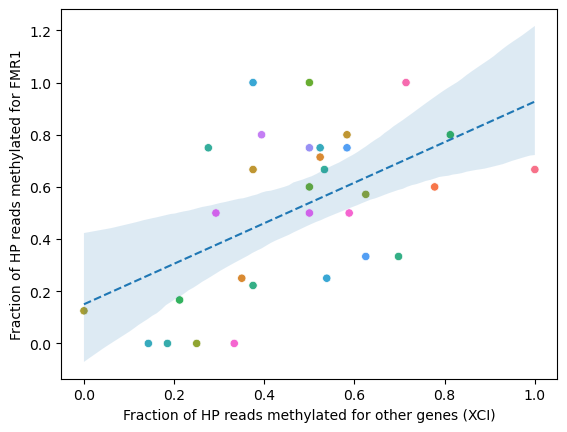

In [20]:
#display(df_hps_fmr1)
#display(df_hps_xci)
cols = ['hp_rep', 'num_reads', 'methylation_mean', 'methylation_mean_binary']
#pd.set_option('display.max_rows', None)
df_merge = pd.merge(df_hps_fmr1[cols], df_hps_xci[cols], left_index=True, right_index=True, how='inner', suffixes=('_fmr1', '_xci'))
df_merge = df_merge.loc[(df_merge.num_reads_fmr1>2)&(df_merge.num_reads_xci>2)]
print('df_merge:')
display(df_merge)
pd.set_option('display.max_rows', 10)

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_merge.loc[(df_merge.methylation_mean_binary_xci<.1)]
#pd.set_option('display.max_rows', None)
print('haplotypes with methylation_mean_binary_xci<.1:') #num_reads>2
display(df_this)

df_this = df_merge.loc[(df_merge.methylation_mean_binary_xci>.9)]
#pd.set_option('display.max_rows', None)
print('haplotypes with methylation_mean_binary_xci>.9:') #num_reads>2
display(df_this)

#x_min=27; x_max=33; y_min=.49; y_max=.51
#df_this = df_hps.loc[(df_hps.hp_rep>x_min)&(df_hps.hp_rep<x_max)&(df_hps.methylation_mean_binary>y_min)&(df_hps.methylation_mean_binary<y_max)]
#pd.set_option('display.max_rows', None)
#print(f'haplotypes with hp_rep>{x_min} & hp_rep<{x_max} & y>{y_min} & y<{y_max}:') #num_reads>2
#pd.set_option('display.max_rows', None)
#display(df_this)
print('==========================================')
##############################

plt.figure()
sb.scatterplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', hue='subject', legend=False)
#sb.scatterplot(data=df_merge, x='methylation_mean_xci', y='methylation_mean_fmr1', hue='subject', legend=False)

sb.regplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
#plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
# Fit linear regression
x = np.array(df_merge.methylation_mean_binary_xci.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model = LinearRegression()
model.fit(x, y)
#y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_merge.methylation_mean_binary_xci)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.xlabel('Fraction of HP reads methylated for other genes (XCI)')
plt.ylabel('Fraction of HP reads methylated for FMR1')
fig_name = f'{dir_fig}/Correlation_methyl_FMR1_and_XCI.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

X_const:


const  methylation_mean_binary_xci  hp_rep_fmr1
subject     hp_tag                                                 
REACH000089 h2        1.0                     1.000000           30
REACH000092 h2        1.0                     0.777778           29
REACH000404 h1        1.0                     0.350000           29
            h2        1.0                     0.523810           19
REACH000417 h1        1.0                     0.375000           28
...                   ...                          ...          ...
REACH000581 h1        1.0                     0.292683           28
            h2        1.0                     0.500000           24
REACH000674 h1        1.0                     0.333333           30
            h2        1.0                     0.588235           30
REACH000727 h1        1.0                     0.714286           30

[31 rows x 3 columns]

stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     13.36
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           8.43e-05
Time:                        13:18:08   Log-Likelihood:                 2.9979
No. Observations:                  31   AIC:                          0.004146
Df Residuals:                      28   BIC:                             4.306
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const

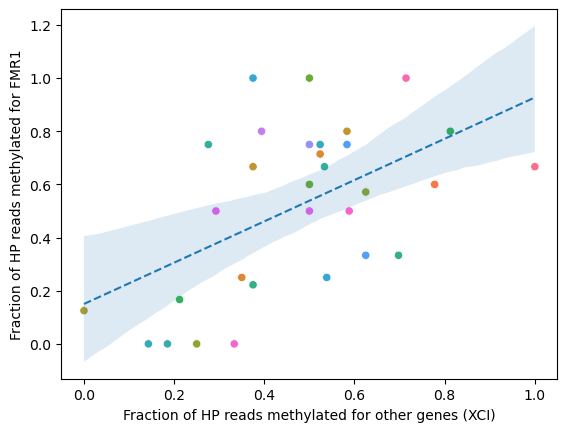

stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     9.318
Date:                Mon, 20 Jan 2025   Prob (F-statistic):            0.00482
Time:                        13:18:08   Log-Likelihood:                -3.0696
No. Observations:                  31   AIC:                             10.14
Df Residuals:                      29   BIC:                             13.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2303      0.250    

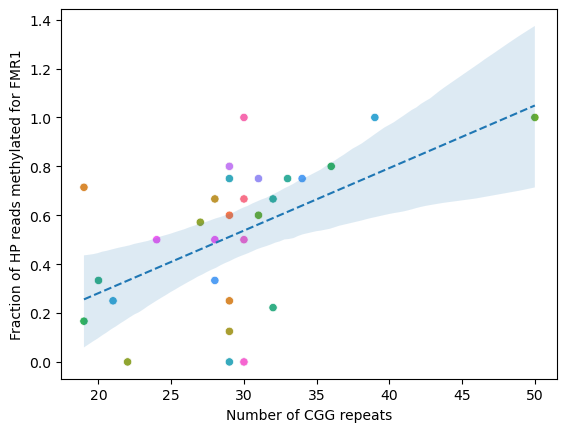

In [24]:
### multi variate linear model: methylation_fmr1 ~ methylation_xci + hp_rep
X = pd.DataFrame(df_merge[['methylation_mean_binary_xci', 'hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
print('X_const:')
display(X_const)
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

### single variate linear model
X = pd.DataFrame(df_merge[['methylation_mean_binary_xci']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.figure()
sb.scatterplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', hue='subject', legend=False)
sb.regplot(data=df_merge, x='methylation_mean_binary_xci', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
plt.xlabel('Fraction of HP reads methylated for other genes (XCI)')
plt.ylabel('Fraction of HP reads methylated for FMR1')
fig_name = f'{dir_fig}/FMR1_methyl_vs_XCI_methyl.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### single variate linear model
X = pd.DataFrame(df_merge[['hp_rep_fmr1']])
X_const = sm.add_constant(X)  # Adds intercept term
y = np.array(df_merge.methylation_mean_binary_fmr1.tolist())
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.figure()
sb.scatterplot(data=df_merge, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', hue='subject', legend=False)
sb.regplot(data=df_merge, x='hp_rep_fmr1', y='methylation_mean_binary_fmr1', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
plt.xlabel('Number of CGG repeats')
plt.ylabel('Fraction of HP reads methylated for FMR1')
fig_name = f'{dir_fig}/FMR1_methyl_vs_CGG_repeats.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
### PLOTS:
# be careful: df_bps is a dataframe containing bps from all samples: male, female, kids, parents. In the plots below we should filter them for females for FMR1 on chrX
# be careful not polt directly with df_bps

In [52]:
### generate a dataframe showing haplotype repeat length for each sample/hap in LongTR genotype
this_df = df_tr_gts.loc[df_tr_gts.GB!='.'].copy()
this_df[['h1_bp_dev', 'h2_bp_dev']] = this_df.GB.str.split('|', expand=True).astype(int)
this_df[['h1_rep', 'h2_rep']] = (this_df[['h1_bp_dev', 'h2_bp_dev']] / 3).apply(round).astype(int) + 20
#this_df = this_df.set_index('Sample_id')
#display(this_df)

df_ltr = pd.DataFrame()
df_tmp = this_df[['Sample_id', 'h1_rep']].copy()
df_tmp['hp_tag'] = 'h1'
df_tmp = df_tmp.rename(columns={'Sample_id': 'subject', 'h1_rep': 'hp_rep'})
#display(df_tmp)
df_ltr = pd.concat([df_ltr, df_tmp])
df_tmp = this_df[['Sample_id', 'h2_rep']].copy()
df_tmp['hp_tag'] = 'h2'
df_tmp = df_tmp.rename(columns={'Sample_id': 'subject', 'h2_rep': 'hp_rep'})
df_ltr = pd.concat([df_ltr, df_tmp])
df_ltr = df_ltr.set_index(['subject', 'hp_tag'])
print('df_ltr:')
display(df_ltr)

df_ltr:


,,hp_rep
subject,hp_tag,
REACH000001,h1,30
REACH000107,h1,20
REACH000226,h1,20
REACH000058,h1,37
REACH000439,h1,36
...,...,...
REACH000685,h2,28
REACH000702,h2,30
REACH000767,h2,30


In [60]:
df_hps_all.index.get_level_values('subject').value_counts()
df_hps_all.loc[('REACH000402', slice(None)), :]
#.groupby(subject)

hp_rep longtr_hp_rep
subject     hp_tag                     
REACH000402 h0         29            NA
            h1         30            29
            h2         29            30

df_hps_all:


hp_rep longtr_hp_rep
subject     hp_tag                     
REACH000058 h0         37            NA
REACH000066 h1         31            NA
            h2         30            NA
REACH000086 h0         30            NA
REACH000087 h1         30            29
...                   ...           ...
REACH000755 h1         20            NA
REACH000762 h0         32            NA
REACH000763 h2         31            NA
REACH000766 h2         31            NA
REACH000767 h0         30            NA

[236 rows x 2 columns]

total number of subjects: 173


hp_rep  longtr_hp_rep
subject     hp_tag                      
REACH000451 h2         49             50
REACH000453 h2         50             50
REACH000519 h2         21             45
REACH000561 h2         50             42
REACH000563 h1         49             26
            h2         32             54

fragile_x_all//compare_longtr_snooptr_gts.png


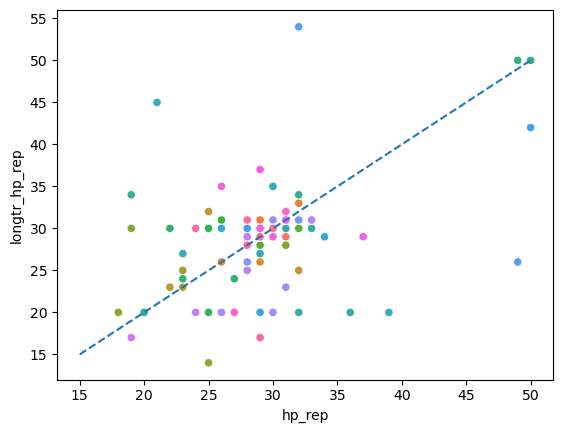

fragile_x_all//dist_num_repeats_snoopsv.png


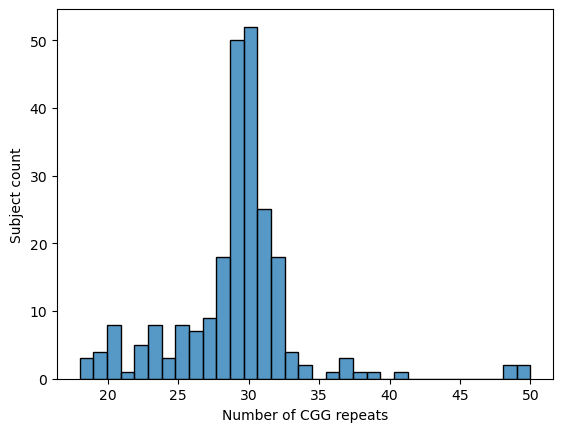

fragile_x_all//dist_num_repeats_longtr.png


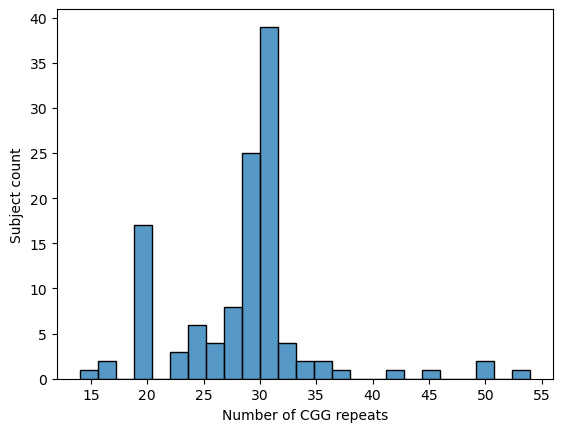

In [53]:
### plot comparison of LongTR and snooptr genotypes
### plot repeat length distribution for all samples
df_hps_all = pd.DataFrame()
# consider only h1 and h2 reads
df_hps_all['hp_rep'] = df_bps.loc[(df_bps.hp_rep!='NA')&(df_bps.region_id=='FMR1_5UTR')].groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
df_hps_all['longtr_hp_rep'] = df_hps_all.index.map(lambda x: df_ltr.loc[x, 'hp_rep'] if x in df_ltr.index else 'NA')
#pd.set_option('display.max_rows', 10)
print('df_hps_all:')
display(df_hps_all)
print(f'total number of subjects: {len(set((df_hps_all.index.get_level_values("subject").tolist())))}')

this_df = df_hps_all.loc[df_hps_all.longtr_hp_rep != "NA"].copy()
this_df.longtr_hp_rep = this_df.longtr_hp_rep.astype(int)

### investigate extreme case subjects
display(this_df.loc[(this_df.longtr_hp_rep>44)|(this_df.hp_rep>44)])

#**df_hps_all_corr = pd.DataFrame(df_hps_all['hp_rep'])
#**#df_hps_all_corr.loc[('REACH000066', 'h1')] = 1000
#**print('df_hps_all_corr:')
#**display(df_hps_all_corr)
#**for subject in set(df_hps_all_corr.index.get_level_values('subject')):
#**    for hp_tag in ['h1', 'h2']
#**    if (subj)
#**    print(f'subject: {subject}')
    

plt.figure()
#plt.plot(this_df.hp_rep, this_df.longtr_hp_rep, 'o')
sb.scatterplot(data=this_df, x='hp_rep', y='longtr_hp_rep', hue='subject', legend=False)
plt.plot([15, 50], [15, 50], '--')
fig_name = f'{dir_fig}/compare_longtr_snooptr_gts.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

plt.figure()
sb.histplot(data=df_hps_all, x='hp_rep')
plt.xlabel('Number of CGG repeats')
plt.ylabel('Subject count')
fig_name = f'{dir_fig}/dist_num_repeats_snoopsv.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

plt.figure()
sb.histplot(data=df_hps_all.loc[df_hps_all.longtr_hp_rep!='NA'], x='longtr_hp_rep')
plt.xlabel('Number of CGG repeats')
plt.ylabel('Subject count')
fig_name = f'{dir_fig}/dist_num_repeats_longtr.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_allreads_females.png


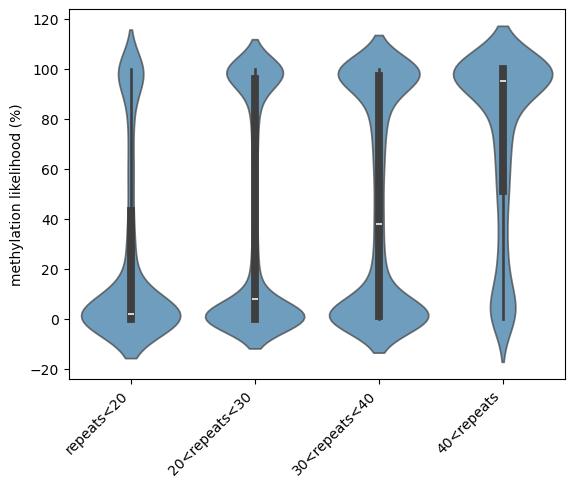

In [19]:
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_bps_fm, x='bp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_allreads_females.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_allreads_female_kids.png


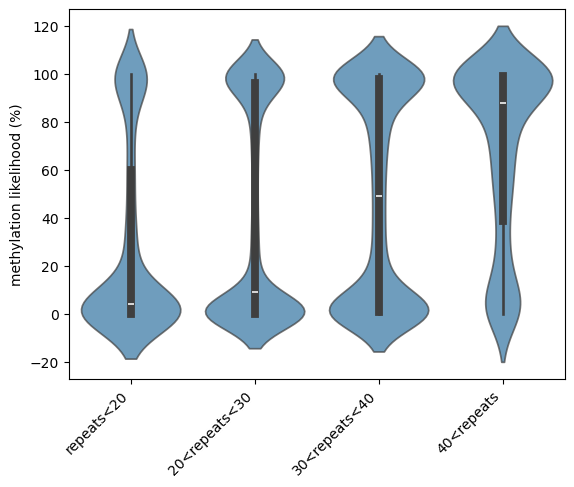

In [20]:
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_bps_fm_kid, x='bp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_allreads_female_kids.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [23]:
#this_df = df_bps_male.loc[(df_bps_male.hp_rep!='NA')].copy()
#this_df['hp_rep'] = this_df.hp_rep.astype(int)
#display(df_bps_male.loc[df_bps_male.bp_dev>60])
print(df_bps_male.loc[df_bps_male.bp_dev>60].subject.value_counts())
print(df_bps_male.loc[df_bps_male.bp_dev>60].bp_dev.value_counts())
print('repeats:')
print(df_bps_male.loc[df_bps_male.bp_dev>60].bp_dev.value_counts().index/3+20)

subject
REACH000560    71
REACH000557    38
REACH000516     9
Name: count, dtype: int64
bp_dev
63    71
79    38
66     9
Name: count, dtype: int64
repeats:
Index([41.0, 46.33333333333333, 42.0], dtype='float64', name='bp_dev')


fragile_x_all//methylation_vs_repeats_allreads_males.png


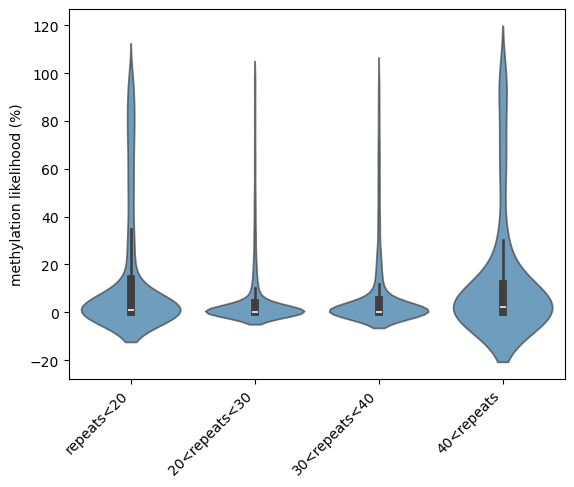

In [45]:
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_bps_male, x='bp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_allreads_males.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [21]:
df_bps.loc[df_bps.hp_bp_dev!='NA'].bp_rep_status.value_counts()

bp_rep_status
XCI (other genes)    34982
20<repeats<30        13796
30<repeats<40         5244
repeats<20            1512
40<repeats            1149
Name: count, dtype: int64

In [23]:
### we don't really need these p-values
groups = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
bins = np.linspace(0,100,101)
#bins = np.linspace(0,101,102)
print(f'bins: {bins}')
pvalue_dict = {}
num_obs_dict = {}
for group in groups:
    print('=====================================')
    print(f'group: {group}')
    df_group = df_flt.loc[df_flt.hp_rep_status==group]
    
    ### null distribution from other genes
    data_null = df_group.loc[df_group.gene_tag=='XCI (other genes)'].methylation
    counts_null, bin_edges = np.histogram(data_null, bins=bins)
    probs_null = counts_null / np.sum(counts_null)
    
    ### observed distribution from FMR1
    data_ob = df_group.loc[df_group.gene_tag=='FMR1 UTR'].methylation
    counts_ob, bin_edges = np.histogram(data_ob, bins=bins)
    
    observed = np.array(list(counts_ob[:8]) + list(counts_ob[-8:]))
    expected_prob = np.array(list(probs_null[:8]) + list(probs_null[-8:]))
    expected_prob = expected_prob / np.sum(expected_prob)
    expected = expected_prob * np.sum(observed)
    print(f'observed: {observed}')
    print(f'expected: {expected}')

    chi2_stat, p_val = chisquare(observed, expected)
    print("Chi-Square statistic:", chi2_stat)
    print("P-value:", p_val)
    pvalue_dict[group] = p_val
    num_obs_dict[group] = np.sum(observed)

print(f'pvalue_dict: {pvalue_dict}')
print(f'num_obs_dict: {num_obs_dict}')

bins: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]
group: repeats<20
observed: [550  62  57  27  24  29  10  13   2   8   5  13  17  13  32 205]
expected: [380.16899892  60.29870829  60.29870829  25.26803014  29.28794403
  24.11948332  16.07965554  10.33692142   6.31700753   9.1883746
  12.05974166  19.52529602  24.69375673  18.9510226   42.49623251
 327.91011841]
Chi-Square statistic: 143.48800662514344
P-value: 4.7103419995277025e-23
group: 20<repeats<30
observed: [4643  719  493  214  197  152   86  134   74  127   96  156

fragile_x_all//methylation_vs_repeats_h1h2reads_FMR1.png


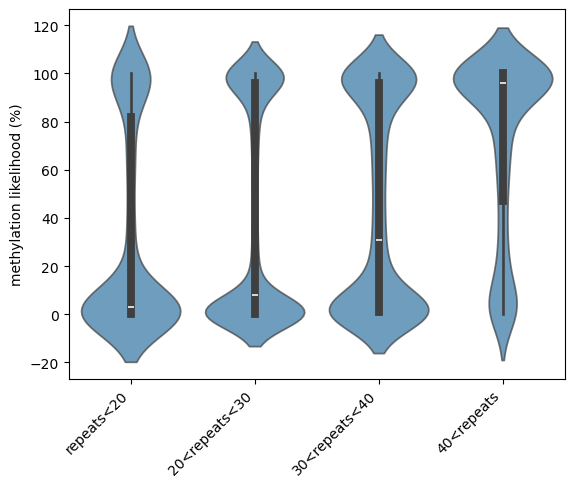

In [22]:
df_plt = df_flt.loc[df_flt.region_id=='FMR1_5UTR']
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_plt, x='hp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_h1h2reads_FMR1.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_h1h2reads_XCI_othergenes.png


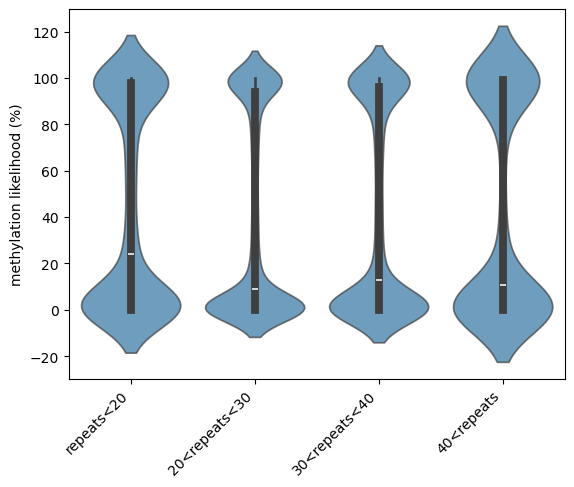

In [23]:
df_plt = df_flt.loc[df_flt.region_id!='FMR1_5UTR']
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
plt.figure()
sb.violinplot(data=df_plt, x='hp_rep_status', y='methylation', alpha=0.7, inner='box', order=order, density_norm='width')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')
fig_name = f'{dir_fig}/methylation_vs_repeats_h1h2reads_XCI_othergenes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

fragile_x_all//methylation_vs_repeats_h1h2reads_allgenes.png


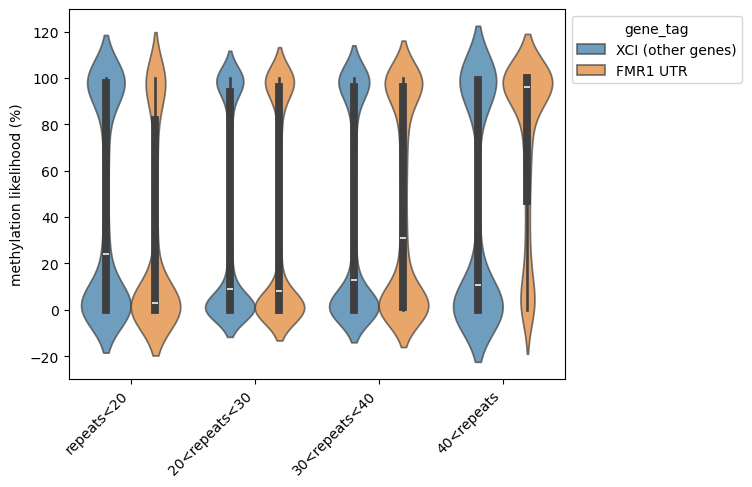

In [24]:
#df_plt = df_flt.loc[df_flt.region_id!='FMR1_5UTR']
order = ['repeats<20', '20<repeats<30', '30<repeats<40', '40<repeats']
hue_order = ['XCI (other genes)', 'FMR1 UTR']
plt.figure()
ax = sb.violinplot(data=df_flt, x='hp_rep_status', y='methylation', hue='gene_tag', dodge=True, hue_order=hue_order, alpha=0.7, inner='box', order=order, density_norm='width')
sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('methylation likelihood (%)')

#dx = .2
##x1, x2 = 3-dx, 3+dx   # columns (first column: 0, see plt.xticks())
#y, h, col = 130, 7, 'k'
#for idx, group in enumerate(order):
#    x1, x2 = idx-dx, idx+dx   # columns (first column: 0, see plt.xticks())
#    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#    plt.text((x1+x2)*.5, y+h, f"p: {pvalue_dict[group]:.2e}\n n: {num_obs_dict[group]}", ha='center', va='bottom', color=col)

fig_name = f'{dir_fig}/methylation_vs_repeats_h1h2reads_allgenes.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
### the cells below are for scatter-like plots:

df_flt_fmr1:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag,hp_rep_status,bp_rep
1490,FMR1_5UTR,5,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1491,FMR1_5UTR,9,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1492,FMR1_5UTR,3,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1493,FMR1_5UTR,4,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
1494,FMR1_5UTR,24,m54340U_210703_193517/98960609/ccs,31,h1,REACH000089,C,2,3.27,20<repeats<30,30,30,FMR1 UTR,20<repeats<30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205465,FMR1_5UTR,0,m54340U_220424_023009/18482344/ccs,32,h2,REACH000641,M,2,3.64,30<repeats<40,32,31,FMR1 UTR,30<repeats<40,31
205466,FMR1_5UTR,0,m54340U_220424_023009/18482344/ccs,32,h2,REACH000641,M,2,3.64,30<repeats<40,32,31,FMR1 UTR,30<repeats<40,31
205467,FMR1_5UTR,0,m54340U_220424_023009/18482344/ccs,32,h2,REACH000641,M,2,3.64,30<repeats<40,32,31,FMR1 UTR,30<repeats<40,31
205468,FMR1_5UTR,0,m54340U_220424_023009/18482344/ccs,32,h2,REACH000641,M,2,3.64,30<repeats<40,32,31,FMR1 UTR,30<repeats<40,31


df_reads:


,bp_rep,methylation_mean,methylation_std,methylation_mean_binary,subject,hp_tag,hp_rep
read_name,,,,,,,
00f9b098-78b4-4f41-b956-cbde27cee4a9,35,81.431034,33.684872,1,REACH000523,h2,29
07c24a39-0e94-441c-b1aa-b0f6859f8a3c,28,84.620000,32.505503,1,REACH000417,h2,29
09485fb3-1645-404e-804a-6f56316d231e,30,91.701754,20.687267,1,REACH000567,h1,31
0add5401-2ea0-4752-aca7-275c77ef8fd6,30,61.538462,43.230555,1,REACH000547,h1,28
0bd12d5a-9141-4216-a118-b7b525d84f29,54,60.217391,38.247210,1,REACH000561,h2,50
...,...,...,...,...,...,...,...
m64278e_220521_114247/50200839/ccs,29,0.785714,2.103800,0,REACH000651,h2,29
m64278e_220611_053613/9243066/ccs,31,0.000000,0.000000,0,REACH000766,h2,31
m64278e_220618_125405/16974869/ccs,30,2.719298,5.608522,0,REACH000289,h1,30


subject
REACH000702       14
REACH000482       12
REACH000479       11
REACH000404       11
REACH000436_PB    10
                  ..
REACH000568        1
REACH000502        1
REACH000511        1
REACH000752        1
REACH000706        1
Name: count, Length: 67, dtype: int64

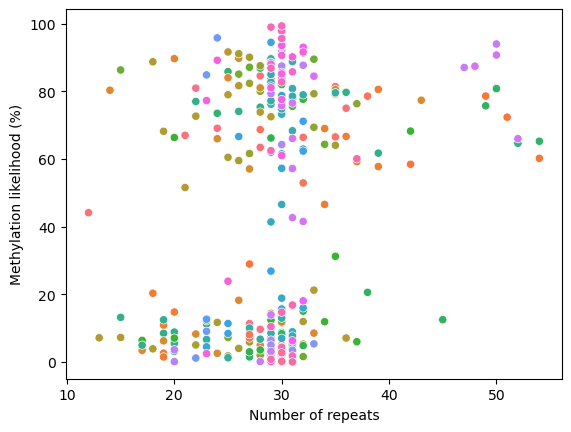

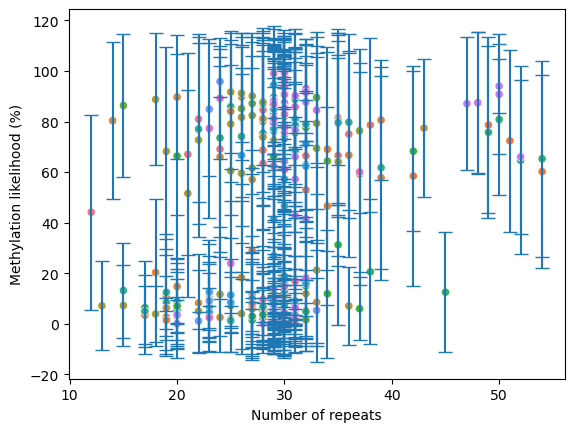

In [30]:
df_flt_fmr1 = df_flt.loc[df_flt.region_id=='FMR1_5UTR'].copy()
df_flt_fmr1['bp_rep'] = (df_flt_fmr1['bp_dev'] / 3).round().astype(int) + 20
print('df_flt_fmr1:')
display(df_flt_fmr1)
df_reads = pd.DataFrame()
df_reads['bp_rep'] = df_flt_fmr1.groupby(by='read_name')['bp_rep'].median().astype(int) # we first get the repeats for each read (the same for each read)
df_reads['methylation_mean'] = df_reads.index.map(df_flt_fmr1.groupby(by='read_name')['methylation'].mean()) # average methylation over bps for each read
df_reads['methylation_std'] = df_reads.index.map(df_flt_fmr1.groupby(by='read_name')['methylation'].std())
df_reads['methylation_mean_binary'] = df_reads['methylation_mean'].apply(lambda x: 1 if x>=50 else 0) # decide if a read is methylated or not (make binary)
df_reads['subject'] = df_reads.index.map(df_flt_fmr1.groupby(by='read_name')['subject'].first())
df_reads['hp_tag'] = df_reads.index.map(df_flt_fmr1.groupby(by='read_name')['hp_tag'].first())
df_reads['hp_rep'] = df_reads.index.map(df_flt_fmr1.groupby(by='read_name')['hp_rep'].first())
print('df_reads:')
display(df_reads)
pd.set_option('display.max_rows', 10)
display(df_reads.subject.value_counts())

plt.figure()
sb.scatterplot(data=df_reads, x='bp_rep', y='methylation_mean', hue='subject', legend=False)
#plt.errorbar(df_reads['bp_rep'], df_reads['methylation_mean'], yerr=df_reads['methylation_std'], fmt='none', capsize=5)
plt.xlabel('Number of repeats')
plt.ylabel('Methylation likelihood (%)')
plt.show()
plt.close()

plt.figure()
sb.scatterplot(data=df_reads, x='bp_rep', y='methylation_mean', hue='subject', legend=False)
plt.errorbar(df_reads['bp_rep'], df_reads['methylation_mean'], yerr=df_reads['methylation_std'], fmt='none', capsize=5)
plt.xlabel('Number of repeats')
plt.ylabel('Methylation likelihood (%)')
plt.show()
plt.close()
#df_flt_fmr1.groupby(by='read_name')['methylation'].std()


df_hps all:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000087 h1          30          1         18.859649              NaN   
            h2          30          4         59.431413        31.915171   
REACH000089 h1          30          2         31.767857        42.098107   
            h2          30          3         55.854861        41.103003   
REACH000092 h1          31          1          7.678571              NaN   
...                    ...        ...               ...              ...   
REACH000727 h1          30          3         86.355011        11.607663   
REACH000752 h1          33          1          5.344262              NaN   
REACH000755 h1          20          3         30.477754        49.626784   
REACH000763 h2          31          2         15.763158         1.501051   
REACH000766 h2          31          1          0.000000              NaN   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000087 h1                     0.000000                     NaN   
            h2                     0.750000                0.500000   
REACH000089 h1                     0.500000                0.707107   
            h2                     0.666667                0.577350   
REACH000092 h1                     0.000000                     NaN   
...                                     ...                     ...   
REACH000727 h1                     1.000000                0.000000   
REACH000752 h1                     0.000000                     NaN   
REACH000755 h1                     0.333333                0.577350   
REACH000763 h2                     0.000000                0.000000   
REACH000766 h2                     0.000000                     NaN   

                        subject hp_tag  
subject     hp_tag                      
REACH000087 h1      REACH000087     h1  
            h2      REACH000087     h2  
REACH000089 h1      REACH000089     h1  
            h2      REACH000089     h2  
REACH000092 h1      REACH000092     h1  
...                         ...    ...  
REACH000727 h1      REACH000727     h1  
REACH000752 h1      REACH000752     h1  
REACH000755 h1      REACH000755     h1  
REACH000763 h2      REACH000763     h2  
REACH000766 h2      REACH000766     h2  

[117 rows x 8 columns]

===================== for investigation ===================
haplotypes with hp_rep<23:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000294,h1,22,1,1.140000,NaN,0.000000,NaN,REACH000294,h1
REACH000401,h1,18,4,44.975787,46.411017,0.500000,0.577350,REACH000401,h1
REACH000404,h2,19,7,54.679653,34.752180,0.714286,0.487950,REACH000404,h2
REACH000420,h1,20,6,6.044481,2.189809,0.000000,0.000000,REACH000420,h1
REACH000435,h2,22,3,6.859690,4.220148,0.000000,0.000000,REACH000435,h2
REACH000479,h2,19,6,21.770969,29.696086,0.166667,0.408248,REACH000479,h2
REACH000482,h2,20,3,26.597935,34.442905,0.333333,0.577350,REACH000482,h2
REACH000519,h2,21,4,28.457060,32.386450,0.250000,0.500000,REACH000519,h2
REACH000755,h1,20,3,30.477754,49.626784,0.333333,0.577350,REACH000755,h1


haplotypes with hp_rep>45:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000451,h2,49,2,90.546320,4.920973,1.00,0.0,REACH000451,h2
REACH000453,h2,50,3,81.419051,13.431833,1.00,0.0,REACH000453,h2
REACH000561,h2,50,4,67.418848,9.705172,1.00,0.0,REACH000561,h2
REACH000563,h1,49,4,58.579873,31.405029,0.75,0.5,REACH000563,h1


haplotypes with hp_rep>27 & hp_rep<33 & y>0.49 & y<0.51:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject        hp_tag                                                         
REACH000089    h1          30          2         31.767857        42.098107   
REACH000107    h1          29          4         43.960021        46.773873   
REACH000314    h1          29          4         43.647400        44.243599   
               h2          31          2         39.386419        33.321498   
REACH000316    h2          29          2         64.092857        32.092546   
REACH000365    h1          30          6         47.325217        49.927682   
REACH000530_PB h2          31          2         49.659791        61.365461   
REACH000541    h1          29          2         39.761006        50.306867   
REACH000565    h2          32          2         42.972727        47.221876   
REACH000579    h2          28          2         46.564327        63.337746   
REACH000581    h1          28          4         34.610856        38.572900   
REACH000628    h1          30          4         38.763158        46.068143   
REACH000674    h2          30          6         46.532769        49.370513   

                       methylation_mean_binary  methylation_std_binary  \
subject        hp_tag                                                    
REACH000089    h1                          0.5                0.707107   
REACH000107    h1                          0.5                0.577350   
REACH000314    h1                          0.5                0.577350   
               h2                          0.5                0.707107   
REACH000316    h2                          0.5                0.707107   
REACH000365    h1                          0.5                0.547723   
REACH000530_PB h2                          0.5                0.707107   
REACH000541    h1                          0.5                0.707107   
REACH000565    h2                          0.5                0.707107   
REACH000579    h2                          0.5                0.707107   
REACH000581    h1                          0.5                0.577350   
REACH000628    h1                          0.5                0.577350   
REACH000674    h2                          0.5                0.547723   

                              subject hp_tag  
subject        hp_tag                         
REACH000089    h1         REACH000089     h1  
REACH000107    h1         REACH000107     h1  
REACH000314    h1         REACH000314     h1  
               h2         REACH000314     h2  
REACH000316    h2         REACH000316     h2  
REACH000365    h1         REACH000365     h1  
REACH000530_PB h2      REACH000530_PB     h2  
REACH000541    h1         REACH000541     h1  
REACH000565    h2         REACH000565     h2  
REACH000579    h2         REACH000579     h2  
REACH000581    h1         REACH000581     h1  
REACH000628    h1         REACH000628     h1  
REACH000674    h2         REACH000674     h2

df_hps num_reads>2:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000087 h2          30          4         59.431413        31.915171   
REACH000089 h2          30          3         55.854861        41.103003   
REACH000092 h2          29          5         47.627256        36.986086   
REACH000093 h1          29          4         83.919643         6.748338   
REACH000107 h1          29          4         43.960021        46.773873   
...                    ...        ...               ...              ...   
REACH000682 h1          29          3          4.507125         3.389182   
REACH000702 h1          29          6         28.637914        44.252899   
            h2          30          8         72.080279        30.669235   
REACH000727 h1          30          3         86.355011        11.607663   
REACH000755 h1          20          3         30.477754        49.626784   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000087 h2                     0.750000                0.500000   
REACH000089 h2                     0.666667                0.577350   
REACH000092 h2                     0.600000                0.547723   
REACH000093 h1                     1.000000                0.000000   
REACH000107 h1                     0.500000                0.577350   
...                                     ...                     ...   
REACH000682 h1                     0.000000                0.000000   
REACH000702 h1                     0.333333                0.516398   
            h2                     0.875000                0.353553   
REACH000727 h1                     1.000000                0.000000   
REACH000755 h1                     0.333333                0.577350   

                        subject hp_tag  
subject     hp_tag                      
REACH000087 h2      REACH000087     h2  
REACH000089 h2      REACH000089     h2  
REACH000092 h2      REACH000092     h2  
REACH000093 h1      REACH000093     h1  
REACH000107 h1      REACH000107     h1  
...                         ...    ...  
REACH000682 h1      REACH000682     h1  
REACH000702 h1      REACH000702     h1  
            h2      REACH000702     h2  
REACH000727 h1      REACH000727     h1  
REACH000755 h1      REACH000755     h1  

[66 rows x 8 columns]

number of subjects: 45
Scikit learn LR model:
Coefficients: [1.38978438]
Intercept: 2.5646370772864913
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     9.311
Date:                Thu, 16 Jan 2025   Prob (F-statistic):            0.00331
Time:                        13:11:56   Log-Likelihood:                -296.51
No. Observations:                  66   AIC:                             597.0
Df Residuals:                      64   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

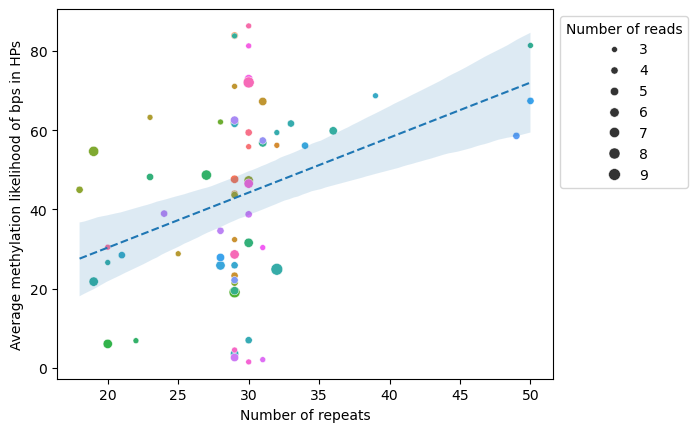

Scikit learn LR model:
Coefficients: [0.02166684]
Intercept: -0.13041522158803887
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     13.98
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000398
Time:                        13:11:56   Log-Likelihood:                -8.4716
No. Observations:                  66   AIC:                             20.94
Df Residuals:                      64   BIC:                             25.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

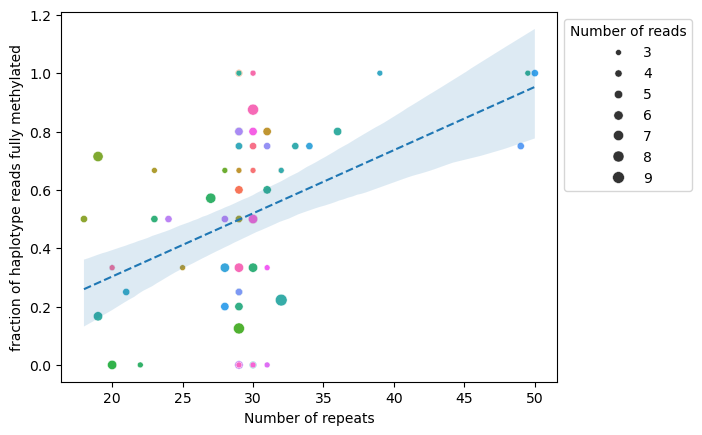

In [42]:
df_hps = pd.DataFrame()
df_hps['hp_rep'] = df_reads.groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
df_hps['num_reads'] = df_reads.groupby(by=['subject', 'hp_tag'])['methylation_mean'].size()
df_hps['methylation_mean'] = df_reads.groupby(by=['subject', 'hp_tag'])['methylation_mean'].mean()
df_hps['methylation_std'] = df_reads.groupby(by=['subject', 'hp_tag'])['methylation_mean'].std()
df_hps['methylation_mean_binary'] = df_reads.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].mean()
df_hps['methylation_std_binary'] = df_reads.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].std()
df_hps['subject'] = df_hps.index.map(lambda x: x[0])
df_hps['hp_tag'] = df_hps.index.map(lambda x: x[1])
pd.set_option('display.max_rows', 10)
print('df_hps all:')
display(df_hps)
#print('df_hps size with num_reads>1:')
#display(df_hps.loc[df_hps.num_reads>1].shape[0])

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_hps.loc[(df_hps.hp_rep<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep<23:') #num_reads>2
display(df_this)

df_this = df_hps.loc[(df_hps.hp_rep>45)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep>45:') #num_reads>2
display(df_this)

x_min=27; x_max=33; y_min=.49; y_max=.51
df_this = df_hps.loc[(df_hps.hp_rep>x_min)&(df_hps.hp_rep<x_max)&(df_hps.methylation_mean_binary>y_min)&(df_hps.methylation_mean_binary<y_max)]
#pd.set_option('display.max_rows', None)
print(f'haplotypes with hp_rep>{x_min} & hp_rep<{x_max} & y>{y_min} & y<{y_max}:') #num_reads>2
pd.set_option('display.max_rows', None)
display(df_this)
print('==========================================')
##############################

df_hps = df_hps.loc[df_hps.num_reads>2]
pd.set_option('display.max_rows', 10)
print('df_hps num_reads>2:')
display(df_hps)

num_subjects = len(set(df_hps['subject'].tolist()))
print(f'number of subjects: {num_subjects}')

### version 1
plt.figure()
sb.scatterplot(data=df_hps, x='hp_rep', y='methylation_mean', hue='subject', size='num_reads')
sb.regplot(data=df_hps, x='hp_rep', y='methylation_mean', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
# Fit linear regression
x = np.array(df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_hps.methylation_mean.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.xlabel('Number of repeats')
plt.ylabel('Average methylation likelihood of bps in HPs')
fig_name = f'{dir_fig}/bp_methylation_likelihood_vs_repeats_FMR1.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### version 2
plt.figure()
df_hps_jitter = pd.DataFrame(df_hps)
df_hps_jitter['hp_rep'] = df_hps_jitter['hp_rep'].astype(float)
df_hps_jitter.loc[('REACH000453', 'h2'), 'hp_rep'] = 49.5
df_hps_jitter.loc[('REACH000461', 'h2'), 'hp_rep'] = 50.5
#sb.scatterplot(data=df_hps, x='hp_rep', y='methylation_mean_binary', hue='subject', size='num_reads')
sb.scatterplot(data=df_hps_jitter, x='hp_rep', y='methylation_mean_binary', hue='subject', size='num_reads')
sb.regplot(data=df_hps, x='hp_rep', y='methylation_mean_binary', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
# Fit linear regression
x = np.array(df_hps.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_hps.methylation_mean_binary.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_hps.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.xlabel('Number of repeats')
plt.ylabel('fraction of haplotype reads fully methylated')
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_FMR1.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
### OLS for XCI other genes

df_flt_xci:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,rel,sex,coverage,bp_rep_status,hp_bp_dev,hp_rep,gene_tag,hp_rep_status,bp_rep
1868,TMEM185A_5UTR,72,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1869,TMEM185A_5UTR,36,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1870,TMEM185A_5UTR,33,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1871,TMEM185A_5UTR,33,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
1872,TMEM185A_5UTR,39,m54340U_210703_193517/51120318/ccs,-21,h1,REACH000089,C,2,3.27,XCI (other genes),30,30,XCI (other genes),20<repeats<30,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202621,HMGB3_5UTR,0,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2,REACH000561,M,2,8.34,XCI (other genes),90,50,XCI (other genes),40<repeats,20
202622,HMGB3_5UTR,0,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2,REACH000561,M,2,8.34,XCI (other genes),90,50,XCI (other genes),40<repeats,20
202623,HMGB3_5UTR,54,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2,REACH000561,M,2,8.34,XCI (other genes),90,50,XCI (other genes),40<repeats,20
202624,HMGB3_5UTR,4,6406dc38-58d9-4e84-8d6b-5817fb556946,-1,h2,REACH000561,M,2,8.34,XCI (other genes),90,50,XCI (other genes),40<repeats,20


df_reads_all:


,bp_rep,methylation_mean,methylation_std,methylation_mean_binary,subject,hp_tag,hp_rep
read_name,,,,,,,
0027fca9-122a-43ab-b29c-4625eeafb4f3,14,84.310345,32.317734,1,REACH000482,h2,20
00c53165-8ffb-45f5-b8f7-4f93e3404614,5,40.370370,43.038577,0,REACH000515,h1,26
00fee989-646b-4bc7-9eb5-ba487a6fa656,21,72.875000,36.431775,1,REACH000579,h1,33
012ccc20-46f6-44c7-89d8-a640cc9f6f5a,19,4.904762,10.059348,0,REACH000518,h2,29
0141e3f8-119d-4c37-9243-67947faca328,11,15.636364,24.582537,0,REACH000482,h2,20
...,...,...,...,...,...,...,...
m64278e_220618_125405/56231204/ccs,20,99.166667,0.408248,1,REACH000289,h2,30
m64278e_220618_125405/61279044/ccs,20,0.000000,0.000000,0,REACH000289,h2,30
m64278e_220618_125405/81135108/ccs,20,97.200000,3.492850,1,REACH000289,h1,30


subject
REACH000581    77
REACH000482    67
REACH000479    65
REACH000579    62
REACH000404    61
               ..
REACH000089     8
REACH000660     7
REACH000098     7
REACH000155     6
REACH000563     1
Name: count, Length: 67, dtype: int64

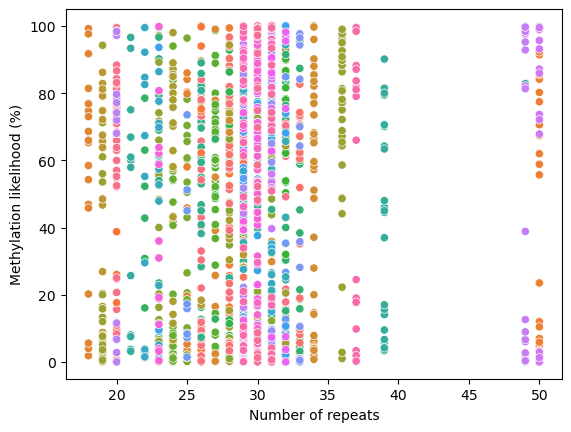

df_hps_all all:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000087 h1          30          9         35.944841        39.181304   
            h2          30          7         59.863159        34.534200   
REACH000089 h1          30          5         49.798303        31.780398   
            h2          30          3         75.888889        21.647539   
REACH000092 h1          31         22         20.957186        28.692205   
...                    ...        ...               ...              ...   
REACH000727 h1          30         21         64.084070        39.921118   
REACH000752 h1          33         14         41.658049        40.894232   
REACH000755 h1          20         15         51.713706        40.257137   
REACH000763 h2          31         14         69.680573        37.437119   
REACH000766 h2          31         18         51.360592        40.967890   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000087 h1                     0.333333                0.500000   
            h2                     0.714286                0.487950   
REACH000089 h1                     0.800000                0.447214   
            h2                     1.000000                0.000000   
REACH000092 h1                     0.181818                0.394771   
...                                     ...                     ...   
REACH000727 h1                     0.714286                0.462910   
REACH000752 h1                     0.428571                0.513553   
REACH000755 h1                     0.600000                0.507093   
REACH000763 h2                     0.785714                0.425815   
REACH000766 h2                     0.611111                0.501631   

                        subject hp_tag  
subject     hp_tag                      
REACH000087 h1      REACH000087     h1  
            h2      REACH000087     h2  
REACH000089 h1      REACH000089     h1  
            h2      REACH000089     h2  
REACH000092 h1      REACH000092     h1  
...                         ...    ...  
REACH000727 h1      REACH000727     h1  
REACH000752 h1      REACH000752     h1  
REACH000755 h1      REACH000755     h1  
REACH000763 h2      REACH000763     h2  
REACH000766 h2      REACH000766     h2  

[116 rows x 8 columns]

===================== for investigation ===================
haplotypes with hp_rep<23:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000294,h1,22,9,57.352651,37.508377,0.666667,0.500000,REACH000294,h1
REACH000401,h1,18,19,58.329904,30.665538,0.684211,0.477567,REACH000401,h1
REACH000404,h2,19,21,46.995576,32.264201,0.523810,0.511766,REACH000404,h2
REACH000420,h1,20,11,22.059372,26.930182,0.181818,0.404520,REACH000420,h1
REACH000435,h2,22,12,24.898338,27.818974,0.250000,0.452267,REACH000435,h2
REACH000479,h2,19,33,19.309253,28.004666,0.212121,0.415149,REACH000479,h2
REACH000482,h2,20,43,53.574915,29.571198,0.697674,0.464701,REACH000482,h2
REACH000519,h2,21,13,43.250863,35.740993,0.538462,0.518875,REACH000519,h2
REACH000755,h1,20,15,51.713706,40.257137,0.600000,0.507093,REACH000755,h1


haplotypes with hp_rep>45:


,,hp_rep,num_reads,methylation_mean,methylation_std,methylation_mean_binary,methylation_std_binary,subject,hp_tag
subject,hp_tag,,,,,,,,
REACH000451,h2,49,27,41.651123,45.746096,0.407407,0.500712,REACH000451,h2
REACH000453,h2,50,24,45.121808,45.900766,0.500000,0.510754,REACH000453,h2
REACH000561,h2,50,20,44.850301,35.781359,0.550000,0.510418,REACH000561,h2
REACH000563,h1,49,1,82.857143,NaN,1.000000,NaN,REACH000563,h1


df_hps_all num_reads>2:


hp_rep  num_reads  methylation_mean  methylation_std  \
subject     hp_tag                                                         
REACH000087 h1          30          9         35.944841        39.181304   
            h2          30          7         59.863159        34.534200   
REACH000089 h1          30          5         49.798303        31.780398   
            h2          30          3         75.888889        21.647539   
REACH000092 h1          31         22         20.957186        28.692205   
...                    ...        ...               ...              ...   
REACH000727 h1          30         21         64.084070        39.921118   
REACH000752 h1          33         14         41.658049        40.894232   
REACH000755 h1          20         15         51.713706        40.257137   
REACH000763 h2          31         14         69.680573        37.437119   
REACH000766 h2          31         18         51.360592        40.967890   

                    methylation_mean_binary  methylation_std_binary  \
subject     hp_tag                                                    
REACH000087 h1                     0.333333                0.500000   
            h2                     0.714286                0.487950   
REACH000089 h1                     0.800000                0.447214   
            h2                     1.000000                0.000000   
REACH000092 h1                     0.181818                0.394771   
...                                     ...                     ...   
REACH000727 h1                     0.714286                0.462910   
REACH000752 h1                     0.428571                0.513553   
REACH000755 h1                     0.600000                0.507093   
REACH000763 h2                     0.785714                0.425815   
REACH000766 h2                     0.611111                0.501631   

                        subject hp_tag  
subject     hp_tag                      
REACH000087 h1      REACH000087     h1  
            h2      REACH000087     h2  
REACH000089 h1      REACH000089     h1  
            h2      REACH000089     h2  
REACH000092 h1      REACH000092     h1  
...                         ...    ...  
REACH000727 h1      REACH000727     h1  
REACH000752 h1      REACH000752     h1  
REACH000755 h1      REACH000755     h1  
REACH000763 h2      REACH000763     h2  
REACH000766 h2      REACH000766     h2  

[115 rows x 8 columns]

number of subjects: 66
Scikit learn LR model:
Coefficients: [0.20798516]
Intercept: 36.29685778506588
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6441
Date:                Wed, 15 Jan 2025   Prob (F-statistic):              0.424
Time:                        10:54:36   Log-Likelihood:                -463.78
No. Observations:                 115   AIC:                             931.6
Df Residuals:                     113   BIC:                             937.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

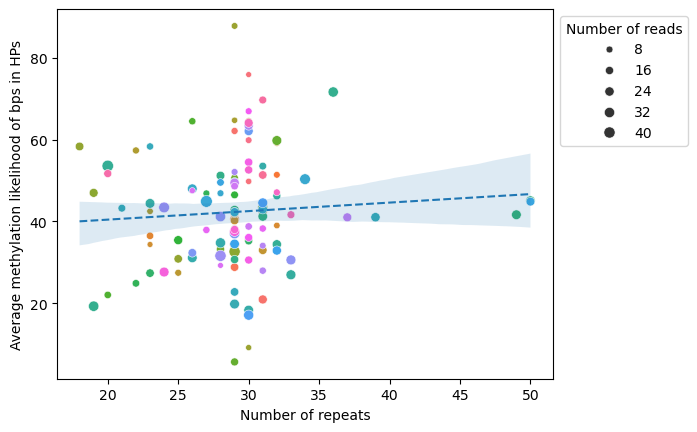

Scikit learn LR model:
Coefficients: [0.00099943]
Intercept: 0.4418922453671797
stats model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.08228
Date:                Wed, 15 Jan 2025   Prob (F-statistic):              0.775
Time:                        10:54:37   Log-Likelihood:                 31.779
No. Observations:                 115   AIC:                            -59.56
Df Residuals:                     113   BIC:                            -54.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

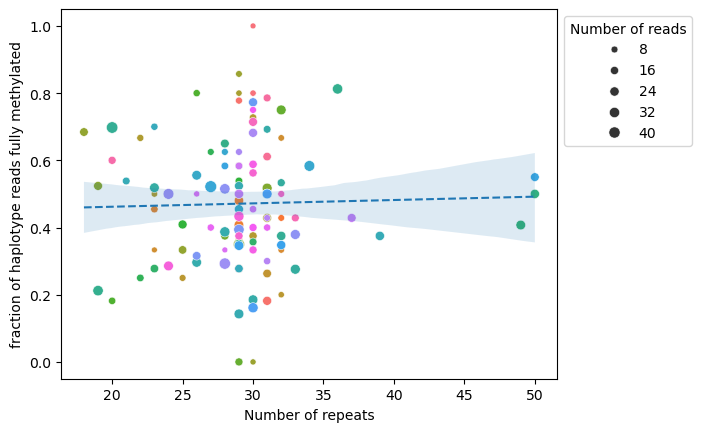

In [32]:
pd.set_option('display.max_rows', 10)
df_flt_xci = df_flt.loc[df_flt.region_id!='FMR1_5UTR'].copy()
df_flt_xci['bp_rep'] = (df_flt_xci['bp_dev'] / 3).round().astype(int) + 20
print('df_flt_xci:')
display(df_flt_xci)

df_reads_all = pd.DataFrame()
df_reads_all['bp_rep'] = df_flt_xci.groupby(by='read_name')['bp_rep'].median().astype(int) # we first get the repeats for each read (the same for each read)
df_reads_all['methylation_mean'] = df_reads_all.index.map(df_flt_xci.groupby(by='read_name')['methylation'].mean()) # average methylation over bps for each read
df_reads_all['methylation_std'] = df_reads_all.index.map(df_flt_xci.groupby(by='read_name')['methylation'].std())
df_reads_all['methylation_mean_binary'] = df_reads_all['methylation_mean'].apply(lambda x: 1 if x>=50 else 0) # decide if a read is methylated or not (make binary)
df_reads_all['subject'] = df_reads_all.index.map(df_flt_xci.groupby(by='read_name')['subject'].first())
df_reads_all['hp_tag'] = df_reads_all.index.map(df_flt_xci.groupby(by='read_name')['hp_tag'].first())
df_reads_all['hp_rep'] = df_reads_all.index.map(df_flt_xci.groupby(by='read_name')['hp_rep'].first())
print('df_reads_all:')
display(df_reads_all)
display(df_reads_all.subject.value_counts())

plt.figure()
sb.scatterplot(data=df_reads_all, x='hp_rep', y='methylation_mean', hue='subject', legend=False)
#plt.errorbar(df_reads['bp_rep'], df_reads['methylation_mean'], yerr=df_reads['methylation_std'], fmt='none', capsize=5)
plt.xlabel('Number of repeats')
plt.ylabel('Methylation likelihood (%)')
plt.show()
plt.close()

df_hps_all = pd.DataFrame()
df_hps_all['hp_rep'] = df_reads_all.groupby(by=['subject', 'hp_tag'])['hp_rep'].first()
df_hps_all['num_reads'] = df_reads_all.groupby(by=['subject', 'hp_tag'])['methylation_mean'].size()
df_hps_all['methylation_mean'] = df_reads_all.groupby(by=['subject', 'hp_tag'])['methylation_mean'].mean()
df_hps_all['methylation_std'] = df_reads_all.groupby(by=['subject', 'hp_tag'])['methylation_mean'].std()
df_hps_all['methylation_mean_binary'] = df_reads_all.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].mean()
df_hps_all['methylation_std_binary'] = df_reads_all.groupby(by=['subject', 'hp_tag'])['methylation_mean_binary'].std()
df_hps_all['subject'] = df_hps_all.index.map(lambda x: x[0])
df_hps_all['hp_tag'] = df_hps_all.index.map(lambda x: x[1])
pd.set_option('display.max_rows', 10)
print('df_hps_all all:')
display(df_hps_all)
#print('df_hps_all size with num_reads>1:')
#display(df_hps_all.loc[df_hps_all.num_reads>1].shape[0])

##### for investigation ######
print('===================== for investigation ===================')
df_this = df_hps_all.loc[(df_hps_all.hp_rep<23)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep<23:') #num_reads>2
display(df_this)

df_this = df_hps_all.loc[(df_hps_all.hp_rep>45)]
#pd.set_option('display.max_rows', None)
print('haplotypes with hp_rep>45:') #num_reads>2
display(df_this)
print('==========================================')
##############################

df_hps_all = df_hps_all.loc[df_hps_all.num_reads>2]
#pd.set_option('display.max_rows', None)
print('df_hps_all num_reads>2:')
display(df_hps_all)

num_subjects = len(set(df_hps_all['subject'].tolist()))
print(f'number of subjects: {num_subjects}')

### version 1
plt.figure()
sb.scatterplot(data=df_hps_all, x='hp_rep', y='methylation_mean', hue='subject', size='num_reads')
sb.regplot(data=df_hps_all, x='hp_rep', y='methylation_mean', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
# Fit linear regression
x = np.array(df_hps_all.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_hps_all.methylation_mean.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_hps_all.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.xlabel('Number of repeats')
plt.ylabel('Average methylation likelihood of bps in HPs')
fig_name = f'{dir_fig}/bp_methylation_likelihood_vs_repeats_XCI.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### version 2
plt.figure()
sb.scatterplot(data=df_hps_all, x='hp_rep', y='methylation_mean_binary', hue='subject', size='num_reads')
sb.regplot(data=df_hps_all, x='hp_rep', y='methylation_mean_binary', ci=95, scatter=False, line_kws=dict(linestyle="--", linewidth=1.5))  # `ci` specifies the confidence interval percentage
plt.legend(title='Number of reads', loc='upper left', bbox_to_anchor=(1, 1), handles=plt.gca().legend_.legend_handles[num_subjects+2:]) 
# Fit linear regression
x = np.array(df_hps_all.hp_rep.tolist()).reshape(-1, 1) # Reshape for sklearn
y = np.array(df_hps_all.methylation_mean_binary.tolist())
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
#plt.plot(x, y_pred, '-ok', label='Regression Line')
# Get weights (coefficients) and intercept
print('Scikit learn LR model:')
print("Coefficients:", model.coef_)  # Slope
print("Intercept:", model.intercept_)  # Intercept

X = pd.DataFrame(df_hps_all.hp_rep)
X_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_const).fit()
# Get summary
print('stats model:')
print(model_sm.summary())

plt.xlabel('Number of repeats')
plt.ylabel('fraction of haplotype reads fully methylated')
fig_name = f'{dir_fig}/haplotype_readFrac_methylation_vs_repeats_XCI.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
### the cells below are for long hp vs short hp plots:

In [14]:
### filter the df to samples with both h1 and h2 (_comp) and only include phased reads in FMR1 and other genes
samples_h1_h2 = list(hp_info_dict_comp.keys())
df_flt = df_bps.loc[df_bps.subject.isin(samples_h1_h2) & df_bps.hp_tag.isin(['h1', 'h2'])].copy()
print(f'number of subjects in the filtered df: {len(set(df_flt.subject.tolist()))}')
print('df_flt filter for h1/h2 complete samples and no h0 reads:')
display(df_flt)

### determine for each sample h1/h2 is "long hp" or "short hp"
def get_length_status(row, info_dict):
    hp_status = 'NA'
    long_hp_dev = -10000
    h1_bp_dev = info_dict[row['subject']]['h1']
    h2_bp_dev = info_dict[row['subject']]['h2']
    if h1_bp_dev > h2_bp_dev:
        long_hp_dev = h1_bp_dev
        if row['hp_tag'] == 'h1':
            hp_status = 'long hp'
        elif row['hp_tag'] == 'h2':
            hp_status = 'short hp'
    if h1_bp_dev < h2_bp_dev:
        long_hp_dev = h2_bp_dev
        if row['hp_tag'] == 'h1':
            hp_status = 'short hp'
        elif row['hp_tag'] == 'h2':
            hp_status = 'long hp'
    hp_rep = -10000
    if row['hp_tag'] == 'h1':
        hp_rep = round(h1_bp_dev / 3) + 20
    elif row['hp_tag'] == 'h2':
        hp_rep = round(h2_bp_dev / 3) + 20
    
    hp_bp_dev = -10000
    if row['hp_tag'] == 'h1':
        hp_bp_dev = h1_bp_dev
    elif row['hp_tag'] == 'h2':
        hp_bp_dev = h2_bp_dev
    return hp_status, hp_rep, hp_bp_dev, long_hp_dev

df_flt['hp_status'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[0], axis=1)
df_flt['hp_rep'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[1], axis=1)
df_flt['hp_bp_dev'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[2], axis=1)
df_flt['long_hp_bp_dev'] = df_flt.apply(lambda row: get_length_status(row, hp_info_dict_comp)[3], axis=1)
df_flt['hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'hp_bp_dev'), axis=1)
df_flt['long_hp_rep_status'] = df_flt.apply(lambda row: get_status(row, 'long_hp_bp_dev'), axis=1)
print('df_flt:')
display(df_flt)
print('df_flt for sample:')
pd.set_option('display.max_rows', 10)
display(df_flt.loc[(df_flt.subject=='REACH000453')])
#print(df_flt.loc[(df_flt.subject=='REACH000453')]['status'].value_counts())
print(df_flt.hp_status.value_counts())

number of subjects in the filtered df: 23
df_flt filter for h1/h2 complete samples and no h0 reads:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,bp_rep_status
0,FMR1_5UTR,59,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40
1,FMR1_5UTR,95,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40
2,FMR1_5UTR,99,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40
3,FMR1_5UTR,100,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40
4,FMR1_5UTR,99,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40
...,...,...,...,...,...,...,...
61933,HMGB3_5UTR,100,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes)
61934,HMGB3_5UTR,99,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes)
61935,HMGB3_5UTR,100,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes)
61936,HMGB3_5UTR,89,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes)


df_flt:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,bp_rep_status,hp_status,hp_rep,hp_bp_dev,long_hp_bp_dev,hp_rep_status,long_hp_rep_status
0,FMR1_5UTR,59,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
1,FMR1_5UTR,95,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
2,FMR1_5UTR,99,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
3,FMR1_5UTR,100,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
4,FMR1_5UTR,99,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61933,HMGB3_5UTR,100,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes),long hp,29,26,26,XCI (other genes),XCI (other genes)
61934,HMGB3_5UTR,99,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes),long hp,29,26,26,XCI (other genes),XCI (other genes)
61935,HMGB3_5UTR,100,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes),long hp,29,26,26,XCI (other genes),XCI (other genes)
61936,HMGB3_5UTR,89,ccbaa4c3-81d6-4e7b-a775-6f4f34c9018f,0,h2,REACH000417,XCI (other genes),long hp,29,26,26,XCI (other genes),XCI (other genes)


df_flt for sample:


,region_id,methylation,read_name,bp_dev,hp_tag,subject,bp_rep_status,hp_status,hp_rep,hp_bp_dev,long_hp_bp_dev,hp_rep_status,long_hp_rep_status
0,FMR1_5UTR,59,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
1,FMR1_5UTR,95,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
2,FMR1_5UTR,99,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
3,FMR1_5UTR,100,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
4,FMR1_5UTR,99,m64278e_211012_051244/63963533/ccs,33,h1,REACH000453,30<repeats<40,short hp,31,33,90,30<repeats<40,40<repeats
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,HMGB3_5UTR,0,m64278e_211012_051244/25298780/ccs,0,h2,REACH000453,XCI (other genes),long hp,50,90,90,XCI (other genes),XCI (other genes)
1706,HMGB3_5UTR,0,m64278e_211012_051244/25298780/ccs,0,h2,REACH000453,XCI (other genes),long hp,50,90,90,XCI (other genes),XCI (other genes)
1707,HMGB3_5UTR,0,m64278e_211012_051244/25298780/ccs,0,h2,REACH000453,XCI (other genes),long hp,50,90,90,XCI (other genes),XCI (other genes)
1708,HMGB3_5UTR,0,m64278e_211012_051244/25298780/ccs,0,h2,REACH000453,XCI (other genes),long hp,50,90,90,XCI (other genes),XCI (other genes)


hp_status
long hp     12229
short hp    10553
NA           2923
Name: count, dtype: int64


20<repeats<30
number of samples: 8
['20', '30']
fragile_x_all//methylation_vs_repeats_longHP_20_30.png


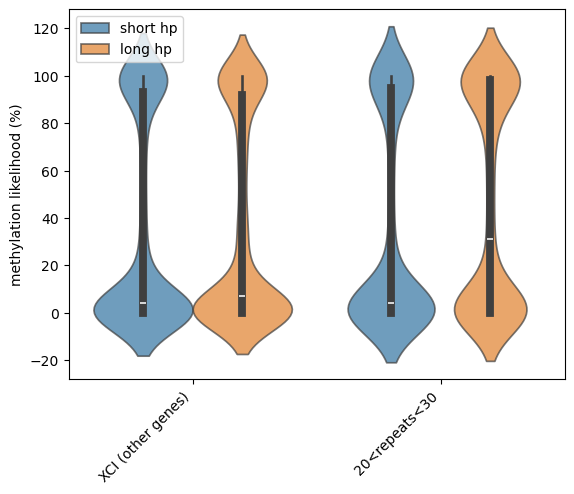

30<repeats<40
number of samples: 10
['30', '40']
fragile_x_all//methylation_vs_repeats_longHP_30_40.png


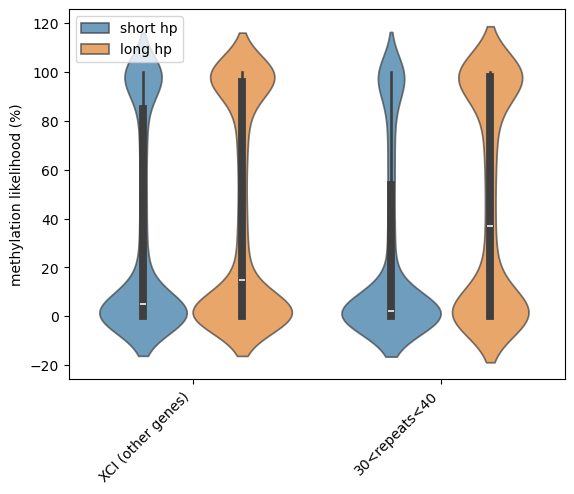

40<repeats
number of samples: 2
['40']
fragile_x_all//methylation_vs_repeats_longHP_40.png


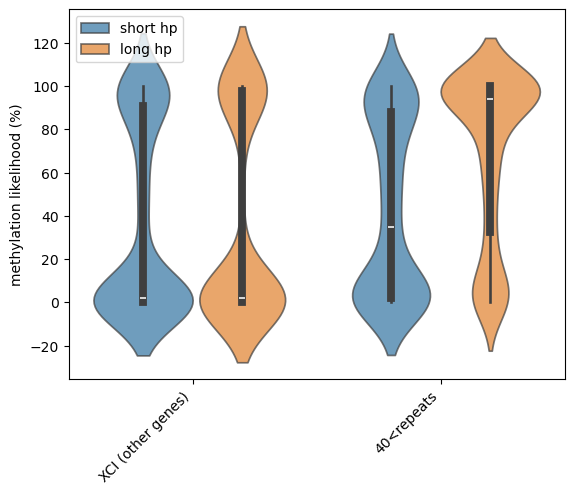

In [21]:
#pd.set_option('display.max_rows', None)
#display(df_flt)
groups = ['20<repeats<30', '30<repeats<40', '40<repeats']
for group in groups:
    print(group)
    df_tmp = df_flt.loc[(df_flt.hp_status=='long hp') & (df_flt.hp_rep_status==group)]
    #display(df_tmp)
    samples_group = list(set(df_tmp.subject.tolist()))
    print(f'number of samples: {len(samples_group)}')
    df_group = df_flt.loc[df_flt.subject.isin(samples_group)]
    #display(df_group)
    margins = [x for x in group.split('<') if x != 'repeats']
    print(margins)
    order = ['XCI (other genes)', group]
    hue_order = ['short hp', 'long hp']
    plt.figure()
    sb.violinplot(data=df_group, x='long_hp_rep_status', y='methylation', hue='hp_status', dodge=True, hue_order=hue_order, alpha=0.7, inner='box', order=order)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('methylation likelihood (%)')
    plt.legend(loc="upper left")
    fig_name = f'{dir_fig}/methylation_vs_repeats_longHP_{"_".join(margins)}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()
    